# Prédiction de revenus

<img src="Images/image_tete.jpg">

## Mes données

Voici la liste des fichiers servant comme base de travail :
- world_income_distribution.csv : Ce fichier contient les données de la World Income Distribution, datée de 2008. Cette base de données est composée principalement d'études réalisées au niveau national pour bon nombre de pays, et contient les distributions de revenus des populations concernées.
  - country
  - year_survey
  - quantile
- gini.csv : Ce sont les indices de Gini estimés par la Banque Mondiale. L'indice de Gini mesure dans quelle mesure la distribution du revenu. entre les individus ou les ménages au sein d'une économie s'écarte d'une distribution parfaitement égale. Le coefficient de Gini est un nombre variant de 0 à 1, où 0 signifie l'égalité parfaite et 1 signifie une inégalité parfaite.
   - Country Code
   - Indicator Code
- metadata_gini.csv : Ces données permettent de faire la correspondance entre les noms anglais des pays et leurs codes. Il y aussi des informations sur le groupe de revenus auquel appartient un Etat.
  - Country Code
- population.csv : Pour connaître le nombre d'habitants de chaque pays présent dans la base. Les noms des pays sont en Français contrairement aux fichiers précédents.
  - Zone
  - Année
- groupe_pays.csv : Ces données permettent de faire la correspondance entre les noms français des pays et leurs codes.
  - Groupe de pays
  - Pays
- GDIMMay2018.csv : Le fichier sert à récupérer les coefficients d'élasticité déterminés par la *Banque Mondiale*.
  - iso3
  - year
  - parent	
  - child
  
<div class="alert alert-block alert-info">
<b>Info :</b> Les clés primaires de chaque table sont indiquées en-dessous de chaque description de fichier.
</div>

## Partie 1
### Chargement et nettoyage des données
#### Distribution des revenus

In [1]:
df_income <- read.csv(file='Data/world_income_distribution.csv', stringsAsFactors=FALSE)
str(df_income) # Equivalent de .info() dans pandas
df_income

'data.frame':	11599 obs. of  6 variables:
 $ country     : chr  "ALB" "ALB" "ALB" "ALB" ...
 $ year_survey : int  2008 2008 2008 2008 2008 2008 2008 2008 2008 2008 ...
 $ quantile    : int  1 2 3 4 5 6 7 8 9 10 ...
 $ nb_quantiles: int  100 100 100 100 100 100 100 100 100 100 ...
 $ income      : chr  "728,89795" "916,66235" "1010,916" "1086,9078" ...
 $ gdpppp      : chr  "7297" "7297" "7297" "7297" ...


country,year_survey,quantile,nb_quantiles,income,gdpppp
ALB,2008,1,100,"728,89795",7297
ALB,2008,2,100,"916,66235",7297
ALB,2008,3,100,"1010,916",7297
ALB,2008,4,100,"1086,9078",7297
ALB,2008,5,100,"1132,6997",7297
ALB,2008,6,100,"1171,1412",7297
ALB,2008,7,100,"1201,1324",7297
ALB,2008,8,100,"1240,8976",7297
ALB,2008,9,100,"1285,6914",7297
ALB,2008,10,100,"1325,2533",7297


In [2]:
# R stocke les deux derniers attributs en tant que variables qualitatives
# Nous allons changer cela
df_income[,'income'] = as.numeric(sub(",",  ".", df_income[,'income']))
df_income[,'gdpppp'] = as.numeric(sub(",",  ".", df_income[,'gdpppp']))
str(df_income)
summary(df_income)

'data.frame':	11599 obs. of  6 variables:
 $ country     : chr  "ALB" "ALB" "ALB" "ALB" ...
 $ year_survey : int  2008 2008 2008 2008 2008 2008 2008 2008 2008 2008 ...
 $ quantile    : int  1 2 3 4 5 6 7 8 9 10 ...
 $ nb_quantiles: int  100 100 100 100 100 100 100 100 100 100 ...
 $ income      : num  729 917 1011 1087 1133 ...
 $ gdpppp      : num  7297 7297 7297 7297 7297 ...


   country           year_survey      quantile      nb_quantiles
 Length:11599       Min.   :2004   Min.   :  1.0   Min.   :100  
 Class :character   1st Qu.:2008   1st Qu.: 25.5   1st Qu.:100  
 Mode  :character   Median :2008   Median : 51.0   Median :100  
                    Mean   :2008   Mean   : 50.5   Mean   :100  
                    3rd Qu.:2008   3rd Qu.: 75.5   3rd Qu.:100  
                    Max.   :2011   Max.   :100.0   Max.   :100  
                                                                
     income              gdpppp       
 Min.   :    16.72   Min.   :    303  
 1st Qu.:   900.69   1st Qu.:   2576  
 Median :  2403.24   Median :   7560  
 Mean   :  6069.22   Mean   :  50221  
 3rd Qu.:  7515.42   3rd Qu.:  18773  
 Max.   :176928.55   Max.   :4300332  
                     NA's   :200      

#### Indices de Gini

In [3]:
df_gini <- read.csv(file='Data/gini.csv', stringsAsFactors=FALSE)
df_gini

ï..Country.Name,Country.Code,Indicator.Name,Indicator.Code,X1960,X1961,X1962,X1963,X1964,X1965,...,X2010,X2011,X2012,X2013,X2014,X2015,X2016,X2017,X2018,X
Aruba,ABW,GINI index (World Bank estimate),SI.POV.GINI,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Afghanistan,AFG,GINI index (World Bank estimate),SI.POV.GINI,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Angola,AGO,GINI index (World Bank estimate),SI.POV.GINI,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Albania,ALB,GINI index (World Bank estimate),SI.POV.GINI,NA,NA,NA,NA,NA,NA,...,NA,NA,29.0,NA,NA,NA,NA,NA,NA,NA
Andorra,AND,GINI index (World Bank estimate),SI.POV.GINI,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Arab World,ARB,GINI index (World Bank estimate),SI.POV.GINI,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
United Arab Emirates,ARE,GINI index (World Bank estimate),SI.POV.GINI,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Argentina,ARG,GINI index (World Bank estimate),SI.POV.GINI,NA,NA,NA,NA,NA,NA,...,43.0,42.3,41.2,41.0,41.4,NA,42.4,NA,NA,NA
Armenia,ARM,GINI index (World Bank estimate),SI.POV.GINI,NA,NA,NA,NA,NA,NA,...,30.0,29.4,29.6,30.6,31.5,32.4,32.5,NA,NA,NA
American Samoa,ASM,GINI index (World Bank estimate),SI.POV.GINI,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [4]:
# Suppression Colonne
df_gini$X <- NULL

# Nombre de valeurs uniques dans la colonne 'Indicator.Code' et 'Indicator.Name'
nb_unique_values <- length(unique(df_gini[,c('Indicator.Code', 'Indicator.Name')]))

# Supression des colonnes si 2 valeurs uniques
if (nb_unique_values == 2){
    df_gini[,c('Indicator.Code', 'Indicator.Name')] <- NULL
}

# Renommage des colonnes
colnames(df_gini) <- sub("X", "", colnames(df_gini)) # Substitution des 'X'
colnames(df_gini)[1:2] <- c("country_name","country_code")

# Vérification des modifications
names(df_gini)

[1] "country_name" "country_code" "1960"         "1961"         "1962"        
 [6] "1963"         "1964"         "1965"         "1966"         "1967"        
[11] "1968"         "1969"         "1970"         "1971"         "1972"        
[16] "1973"         "1974"         "1975"         "1976"         "1977"        
[21] "1978"         "1979"         "1980"         "1981"         "1982"        
[26] "1983"         "1984"         "1985"         "1986"         "1987"        
[31] "1988"         "1989"         "1990"         "1991"         "1992"        
[36] "1993"         "1994"         "1995"         "1996"         "1997"        
[41] "1998"         "1999"         "2000"         "2001"         "2002"        
[46] "2003"         "2004"         "2005"         "2006"         "2007"        
[51] "2008"         "2009"         "2010"         "2011"         "2012"        
[56] "2013"         "2014"         "2015"         "2016"         "2017"        
[61] "2018"

In [5]:
# Suppression des années inutiles
# Je garde trois années pour répondre à la question sur l'évolution de l'indice
df_gini <- df_gini[, c('country_name', 'country_code', '2002', '2008', '2014')]
names(df_gini)[names(df_gini) == '2002'] <- 'true_gini2002'
names(df_gini)[names(df_gini) == '2008'] <- 'true_gini2008'
names(df_gini)[names(df_gini) == '2014'] <- 'true_gini2014'

str(df_gini)
summary(df_gini)

# Determination du nombre de valeurs qui ne sont pas des NA dans la colonne gini
print("nombre de valeurs dans la colonne gini : ")
sum(!is.na(df_gini$gini))

'data.frame':	264 obs. of  5 variables:
 $ country_name : chr  "Aruba" "Afghanistan" "Angola" "Albania" ...
 $ country_code : chr  "ABW" "AFG" "AGO" "ALB" ...
 $ true_gini2002: num  NA NA NA 31.7 NA NA NA 53.8 34.8 NA ...
 $ true_gini2008: num  NA NA 42.7 30 NA NA NA 44.5 29.2 NA ...
 $ true_gini2014: num  NA NA NA NA NA NA NA 41.4 31.5 NA ...


 country_name       country_code       true_gini2002   true_gini2008  
 Length:264         Length:264         Min.   :17.40   Min.   :23.70  
 Class :character   Class :character   1st Qu.:35.70   1st Qu.:30.60  
 Mode  :character   Mode  :character   Median :41.40   Median :34.45  
                                       Mean   :43.19   Mean   :37.41  
                                       3rd Qu.:51.75   3rd Qu.:44.17  
                                       Max.   :64.70   Max.   :63.00  
                                       NA's   :221     NA's   :194    
 true_gini2014  
 Min.   :24.00  
 1st Qu.:29.38  
 Median :34.95  
 Mean   :36.39  
 3rd Qu.:41.35  
 Max.   :63.00  
 NA's   :194    

[1] "nombre de valeurs dans la colonne gini : "


[1] 0

In [6]:
df_mt_gini <- read.csv(file='Data/metadata_gini.csv', encoding='iso-8859-1', na.strings=c("","NA"), stringsAsFactors=FALSE)
str(df_mt_gini)
head(df_mt_gini)

'data.frame':	263 obs. of  6 variables:
 $ ï..Country.Code: chr  "ABW" "AFG" "AGO" "ALB" ...
 $ Region         : chr  "Latin America & Caribbean" "South Asia" "Sub-Saharan Africa" "Europe & Central Asia" ...
 $ IncomeGroup    : chr  "High income" "Low income" "Lower middle income" "Upper middle income" ...
 $ SpecialNotes   : chr  "Mining is included in agriculture\nElectricty and gas includes manufactures of refined petroleoum products" "Fiscal year end: March 20; reporting period for national accounts data is calendar year, estimated to insure co"| __truncated__ NA NA ...
 $ TableName      : chr  "Aruba" "Afghanistan" "Angola" "Albania" ...
 $ X              : logi  NA NA NA NA NA NA ...


ï..Country.Code,Region,IncomeGroup,SpecialNotes,TableName,X
ABW,Latin America & Caribbean,High income,Mining is included in agriculture Electricty and gas includes manufactures of refined petroleoum products,Aruba,NA
AFG,South Asia,Low income,"Fiscal year end: March 20; reporting period for national accounts data is calendar year, estimated to insure consistency between national accounts and fiscal data. National accounts data are sourced from the IMF and differ from the Central Statistics Organization numbers due to exclusion of the opium economy.",Afghanistan,NA
AGO,Sub-Saharan Africa,Lower middle income,NA,Angola,NA
ALB,Europe & Central Asia,Upper middle income,NA,Albania,NA
AND,Europe & Central Asia,High income,WB-3 code changed from ADO to AND to align with ISO code.,Andorra,NA
ARB,NA,NA,Arab World aggregate. Arab World is composed of members of the League of Arab States.,Arab World,NA


In [7]:
library(dplyr) # Pour faire la jointure

df_mt_gini <- df_mt_gini[, c('ï..Country.Code', 'Region', 'IncomeGroup')]
colnames(df_mt_gini) <- c('country_code', 'region', 'income_group')

df_gini <- left_join(df_gini, df_mt_gini, by=c("country_code"))

str(df_gini)
head(df_gini)
summary(df_gini)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



'data.frame':	264 obs. of  7 variables:
 $ country_name : chr  "Aruba" "Afghanistan" "Angola" "Albania" ...
 $ country_code : chr  "ABW" "AFG" "AGO" "ALB" ...
 $ true_gini2002: num  NA NA NA 31.7 NA NA NA 53.8 34.8 NA ...
 $ true_gini2008: num  NA NA 42.7 30 NA NA NA 44.5 29.2 NA ...
 $ true_gini2014: num  NA NA NA NA NA NA NA 41.4 31.5 NA ...
 $ region       : chr  "Latin America & Caribbean" "South Asia" "Sub-Saharan Africa" "Europe & Central Asia" ...
 $ income_group : chr  "High income" "Low income" "Lower middle income" "Upper middle income" ...


country_name,country_code,true_gini2002,true_gini2008,true_gini2014,region,income_group
Aruba,ABW,NA,NA,NA,Latin America & Caribbean,High income
Afghanistan,AFG,NA,NA,NA,South Asia,Low income
Angola,AGO,NA,42.7,NA,Sub-Saharan Africa,Lower middle income
Albania,ALB,31.7,30.0,NA,Europe & Central Asia,Upper middle income
Andorra,AND,NA,NA,NA,Europe & Central Asia,High income
Arab World,ARB,NA,NA,NA,NA,NA


 country_name       country_code       true_gini2002   true_gini2008  
 Length:264         Length:264         Min.   :17.40   Min.   :23.70  
 Class :character   Class :character   1st Qu.:35.70   1st Qu.:30.60  
 Mode  :character   Mode  :character   Median :41.40   Median :34.45  
                                       Mean   :43.19   Mean   :37.41  
                                       3rd Qu.:51.75   3rd Qu.:44.17  
                                       Max.   :64.70   Max.   :63.00  
                                       NA's   :221     NA's   :194    
 true_gini2014      region          income_group      
 Min.   :24.00   Length:264         Length:264        
 1st Qu.:29.38   Class :character   Class :character  
 Median :34.95   Mode  :character   Mode  :character  
 Mean   :36.39                                        
 3rd Qu.:41.35                                        
 Max.   :63.00                                        
 NA's   :194                                   

In [8]:
df_gini[is.na(df_gini$region), ]

,country_name,country_code,true_gini2002,true_gini2008,true_gini2014,region,income_group
6,Arab World,ARB,NA,NA,NA,NA,NA
35,Central Europe and the Baltics,CEB,NA,NA,NA,NA,NA
48,Caribbean small states,CSS,NA,NA,NA,NA,NA
60,East Asia & Pacific (excluding high income),EAP,NA,NA,NA,NA,NA
61,Early-demographic dividend,EAR,NA,NA,NA,NA,NA
62,East Asia & Pacific,EAS,NA,NA,NA,NA,NA
63,Europe & Central Asia (excluding high income),ECA,NA,NA,NA,NA,NA
64,Europe & Central Asia,ECS,NA,NA,NA,NA,NA
67,Euro area,EMU,NA,NA,NA,NA,NA
72,European Union,EUU,NA,NA,NA,NA,NA


In [9]:
# Je peux supprimer les NA ici car ce sont des données qui ne concernent pas des pays
df_gini <- df_gini[!is.na(df_gini$region), ]
str(df_gini)
summary(df_gini)

'data.frame':	217 obs. of  7 variables:
 $ country_name : chr  "Aruba" "Afghanistan" "Angola" "Albania" ...
 $ country_code : chr  "ABW" "AFG" "AGO" "ALB" ...
 $ true_gini2002: num  NA NA NA 31.7 NA NA 53.8 34.8 NA NA ...
 $ true_gini2008: num  NA NA 42.7 30 NA NA 44.5 29.2 NA NA ...
 $ true_gini2014: num  NA NA NA NA NA NA 41.4 31.5 NA NA ...
 $ region       : chr  "Latin America & Caribbean" "South Asia" "Sub-Saharan Africa" "Europe & Central Asia" ...
 $ income_group : chr  "High income" "Low income" "Lower middle income" "Upper middle income" ...


 country_name       country_code       true_gini2002   true_gini2008  
 Length:217         Length:217         Min.   :17.40   Min.   :23.70  
 Class :character   Class :character   1st Qu.:35.70   1st Qu.:30.60  
 Mode  :character   Mode  :character   Median :41.40   Median :34.45  
                                       Mean   :43.19   Mean   :37.41  
                                       3rd Qu.:51.75   3rd Qu.:44.17  
                                       Max.   :64.70   Max.   :63.00  
                                       NA's   :174     NA's   :147    
 true_gini2014      region          income_group      
 Min.   :24.00   Length:217         Length:217        
 1st Qu.:29.38   Class :character   Class :character  
 Median :34.95   Mode  :character   Mode  :character  
 Mean   :36.39                                        
 3rd Qu.:41.35                                        
 Max.   :63.00                                        
 NA's   :147                                   

Il manque trop de vrais indices de Gini. Je vais donc le recalculer à partir de df_income mais le résultat sera plus approximatif.

In [10]:
# https://www.rdocumentation.org/packages/DescTools/versions/0.99.19/topics/Gini
# install.packages("ineq")
library(ineq) # Pour Gini et la courbe de Lorenz

# Calcul de l'indice de Gini pour chaque pays
# https://nsaunders.wordpress.com/2010/08/20/a-brief-introduction-to-apply-in-r/
df <- tapply(df_income$income, df_income$country , Gini) # Renvoie un indice de gini pour chaque pays
df <- cbind(read.table(text = names(df)), df) # Transformation du vecteur en dataframe
colnames(df) <- c("country", "created_gini2008")
df_income <- inner_join(df_income, df) # Jointure interne pour remplir toutes les lignes

# Pour les jointures futures
colnames(df_income)[1] <- "country_code"

# Vérif des modifs
str(df_income)
summary(df_income)
head(df_income)

Joining, by = "country"
Warning message:
"Column `country` joining character vector and factor, coercing into character vector"

'data.frame':	11599 obs. of  7 variables:
 $ country_code    : chr  "ALB" "ALB" "ALB" "ALB" ...
 $ year_survey     : int  2008 2008 2008 2008 2008 2008 2008 2008 2008 2008 ...
 $ quantile        : int  1 2 3 4 5 6 7 8 9 10 ...
 $ nb_quantiles    : int  100 100 100 100 100 100 100 100 100 100 ...
 $ income          : num  729 917 1011 1087 1133 ...
 $ gdpppp          : num  7297 7297 7297 7297 7297 ...
 $ created_gini2008: num  0.305 0.305 0.305 0.305 0.305 ...


 country_code        year_survey      quantile      nb_quantiles
 Length:11599       Min.   :2004   Min.   :  1.0   Min.   :100  
 Class :character   1st Qu.:2008   1st Qu.: 25.5   1st Qu.:100  
 Mode  :character   Median :2008   Median : 51.0   Median :100  
                    Mean   :2008   Mean   : 50.5   Mean   :100  
                    3rd Qu.:2008   3rd Qu.: 75.5   3rd Qu.:100  
                    Max.   :2011   Max.   :100.0   Max.   :100  
                                                                
     income              gdpppp        created_gini2008
 Min.   :    16.72   Min.   :    303   Min.   :0.2307  
 1st Qu.:   900.69   1st Qu.:   2576   1st Qu.:0.3094  
 Median :  2403.24   Median :   7560   Median :0.3617  
 Mean   :  6069.22   Mean   :  50221   Mean   :0.3790  
 3rd Qu.:  7515.42   3rd Qu.:  18773   3rd Qu.:0.4374  
 Max.   :176928.55   Max.   :4300332   Max.   :0.6698  
                     NA's   :200                       

country_code,year_survey,quantile,nb_quantiles,income,gdpppp,created_gini2008
ALB,2008,1,100,728.8980,7297,0.3046243
ALB,2008,2,100,916.6623,7297,0.3046243
ALB,2008,3,100,1010.9160,7297,0.3046243
ALB,2008,4,100,1086.9078,7297,0.3046243
ALB,2008,5,100,1132.6997,7297,0.3046243
ALB,2008,6,100,1171.1412,7297,0.3046243


#### Population mondiale

In [11]:
df_pop <- read.csv(file='Data/population.csv', encoding = "UTF-8", stringsAsFactors=FALSE)
df_pop <- df_pop[df_pop$Année == 2008 & df_pop$Élément == 'Population totale',] # Je n'ai besoin que de l'année 2008 
str(df_pop)
head(df_pop)

'data.frame':	231 obs. of  15 variables:
 $ Code.Domaine          : chr  "OA" "OA" "OA" "OA" ...
 $ Domaine               : chr  "Séries temporelles annuelles" "Séries temporelles annuelles" "Séries temporelles annuelles" "Séries temporelles annuelles" ...
 $ Code.zone             : int  2 202 3 4 79 6 7 258 8 151 ...
 $ Zone                  : chr  "Afghanistan" "Afrique du Sud" "Albanie" "Algérie" ...
 $ Code.Élément          : int  511 511 511 511 511 511 511 511 511 511 ...
 $ Élément               : chr  "Population totale" "Population totale" "Population totale" "Population totale" ...
 $ Code.Produit          : int  3010 3010 3010 3010 3010 3010 3010 3010 3010 3010 ...
 $ Produit               : chr  "Population-Estimations" "Population-Estimations" "Population-Estimations" "Population-Estimations" ...
 $ Code.année            : int  2008 2008 2008 2008 2008 2008 2008 2008 2008 2008 ...
 $ Année                 : int  2008 2008 2008 2008 2008 2008 2008 2008 2008 2008 ...
 $ Unit

,Code.Domaine,Domaine,Code.zone,Zone,Code.Élément,Élément,Code.Produit,Produit,Code.année,Année,Unité,Valeur,Symbole,Description.du.Symbole,Note
2,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2008,2008,1000 personnes,27294.031,X,Sources internationales sûres,"UNDESA, Population Division – World Population Prospects, the 2017 Revision"
32,OA,Séries temporelles annuelles,202,Afrique du Sud,511,Population totale,3010,Population-Estimations,2008,2008,1000 personnes,50412.129,X,Sources internationales sûres,"UNDESA, Population Division – World Population Prospects, the 2017 Revision"
62,OA,Séries temporelles annuelles,3,Albanie,511,Population totale,3010,Population-Estimations,2008,2008,1000 personnes,2991.651,X,Sources internationales sûres,"UNDESA, Population Division – World Population Prospects, the 2017 Revision"
92,OA,Séries temporelles annuelles,4,Algérie,511,Population totale,3010,Population-Estimations,2008,2008,1000 personnes,34860.715,X,Sources internationales sûres,"UNDESA, Population Division – World Population Prospects, the 2017 Revision"
122,OA,Séries temporelles annuelles,79,Allemagne,511,Population totale,3010,Population-Estimations,2008,2008,1000 personnes,81130.944,X,Sources internationales sûres,"UNDESA, Population Division – World Population Prospects, the 2017 Revision"
152,OA,Séries temporelles annuelles,6,Andorre,511,Population totale,3010,Population-Estimations,2008,2008,1000 personnes,83.861,X,Sources internationales sûres,"UNDESA, Population Division – World Population Prospects, the 2017 Revision"


In [12]:
df_pop <- df_pop[,c('Code.zone', 'Zone', 'Valeur')]
colnames(df_pop) <- c('Code.Pays', 'Pays', 'Population')
df_pop$Population <- df_pop$Population * 1000

head(df_pop)

,Code.Pays,Pays,Population
2,2,Afghanistan,27294031
32,202,Afrique du Sud,50412129
62,3,Albanie,2991651
92,4,Algérie,34860715
122,79,Allemagne,81130944
152,6,Andorre,83861


In [13]:
duplicates_china = c("Chine, continentale", 
                   "Chine - RAS de Hong-Kong", 
                   "Chine - RAS de Macao", 
                   "Chine, Taiwan Province de"
)


# Affichage de la population mondiale
world_pop <- sum(df_pop[!df_pop$Pays %in% duplicates_china, 'Population'])
print(world_pop)

[1] 6789771253


In [14]:
# Nous allons récupérer le code de chaque pays
df_gp_pays <- read.csv(file='Data/groupe_pays.csv', encoding ="UTF-8", stringsAsFactors=FALSE)
str(df_gp_pays)
head(df_gp_pays)

'data.frame':	792 obs. of  7 variables:
 $ Code.Groupe.de.pays: int  5100 5100 5100 5100 5100 5100 5100 5100 5100 5100 ...
 $ Groupe.de.pays     : chr  "Afrique" "Afrique" "Afrique" "Afrique" ...
 $ Code.Pays          : int  202 4 7 53 20 233 35 32 46 107 ...
 $ Pays               : chr  "Afrique du Sud" "Algérie" "Angola" "Bénin" ...
 $ Code.M49           : int  710 12 24 204 72 854 132 120 178 384 ...
 $ Code.ISO2          : chr  "ZA" "DZ" "AO" "BJ" ...
 $ Code.ISO3          : chr  "ZAF" "DZA" "AGO" "BEN" ...


Code.Groupe.de.pays,Groupe.de.pays,Code.Pays,Pays,Code.M49,Code.ISO2,Code.ISO3
5100,Afrique,202,Afrique du Sud,710,ZA,ZAF
5100,Afrique,4,Algérie,12,DZ,DZA
5100,Afrique,7,Angola,24,AO,AGO
5100,Afrique,53,Bénin,204,BJ,BEN
5100,Afrique,20,Botswana,72,BW,BWA
5100,Afrique,233,Burkina Faso,854,BF,BFA


In [15]:
df_gp_pays <- df_gp_pays[,c('Code.Pays', 'Pays', 'Code.ISO3')]
df_gp_pays <- distinct(df_gp_pays) # Suppression des lignes dupliquées
df_pop <- left_join(df_pop, df_gp_pays, by=c("Code.Pays", "Pays"))
str(df_pop)
head(df_pop)

'data.frame':	232 obs. of  4 variables:
 $ Code.Pays : int  2 202 3 4 79 6 7 258 8 151 ...
 $ Pays      : chr  "Afghanistan" "Afrique du Sud" "Albanie" "Algérie" ...
 $ Population: num  27294031 50412129 2991651 34860715 81130944 ...
 $ Code.ISO3 : chr  "AFG" "ZAF" "ALB" "DZA" ...


Code.Pays,Pays,Population,Code.ISO3
2,Afghanistan,27294031,AFG
202,Afrique du Sud,50412129,ZAF
3,Albanie,2991651,ALB
4,Algérie,34860715,DZA
79,Allemagne,81130944,DEU
6,Andorre,83861,NA


In [16]:
df_pop[is.na(df_pop$Code.ISO3),]

,Code.Pays,Pays,Population,Code.ISO3
6,6,Andorre,83861,NA
8,258,Anguilla,13360,NA
14,22,Aruba,101353,NA
19,13,Bahreïn,1114590,NA
27,18,Bhoutan,700950,NA
35,29,Burundi,8212264,NA
47,45,Comores,657229,NA
60,178,Érythrée,4232636,NA
73,82,Gibraltar,32732,NA
76,85,Groenland,56841,NA


In [17]:
# Je vérifie les codes des différents territoires de Chine pour savoir si je peux supprimer le regroupement 'Chine'
df_pop[df_pop$Pays %in% duplicates_china,]

,Code.Pays,Pays,Population,Code.ISO3
41,96,Chine - RAS de Hong-Kong,6940323,HKG
42,128,Chine - RAS de Macao,514348,MAC
43,41,"Chine, continentale",1344415227,CHN
44,214,"Chine, Taiwan Province de",22928526,TWN


In [18]:
df_pop <- df_pop[complete.cases(df_pop), ] # Suppression des NA
colnames(df_pop) <- c('code_pays', 'pays', 'population', 'country_code')
summary(df_pop)

   code_pays         pays             population        country_code      
 Min.   :  1.0   Length:175         Min.   :5.033e+04   Length:175        
 1st Qu.: 64.5   Class :character   1st Qu.:2.400e+06   Class :character  
 Median :121.0   Mode  :character   Median :8.822e+06   Mode  :character  
 Mean   :125.2                      Mean   :3.824e+07                     
 3rd Qu.:186.5                      3rd Qu.:2.679e+07                     
 Max.   :273.0                      Max.   :1.344e+09                     

#### Regroupement de toutes les tables

In [19]:
df_all <- df_income
df_all <- left_join(df_all, df_gini, by="country_code")

str(df_all)
head(df_all)
summary(df_all)

'data.frame':	11599 obs. of  13 variables:
 $ country_code    : chr  "ALB" "ALB" "ALB" "ALB" ...
 $ year_survey     : int  2008 2008 2008 2008 2008 2008 2008 2008 2008 2008 ...
 $ quantile        : int  1 2 3 4 5 6 7 8 9 10 ...
 $ nb_quantiles    : int  100 100 100 100 100 100 100 100 100 100 ...
 $ income          : num  729 917 1011 1087 1133 ...
 $ gdpppp          : num  7297 7297 7297 7297 7297 ...
 $ created_gini2008: num  0.305 0.305 0.305 0.305 0.305 ...
 $ country_name    : chr  "Albania" "Albania" "Albania" "Albania" ...
 $ true_gini2002   : num  31.7 31.7 31.7 31.7 31.7 31.7 31.7 31.7 31.7 31.7 ...
 $ true_gini2008   : num  30 30 30 30 30 30 30 30 30 30 ...
 $ true_gini2014   : num  NA NA NA NA NA NA NA NA NA NA ...
 $ region          : chr  "Europe & Central Asia" "Europe & Central Asia" "Europe & Central Asia" "Europe & Central Asia" ...
 $ income_group    : chr  "Upper middle income" "Upper middle income" "Upper middle income" "Upper middle income" ...


country_code,year_survey,quantile,nb_quantiles,income,gdpppp,created_gini2008,country_name,true_gini2002,true_gini2008,true_gini2014,region,income_group
ALB,2008,1,100,728.8980,7297,0.3046243,Albania,31.7,30,NA,Europe & Central Asia,Upper middle income
ALB,2008,2,100,916.6623,7297,0.3046243,Albania,31.7,30,NA,Europe & Central Asia,Upper middle income
ALB,2008,3,100,1010.9160,7297,0.3046243,Albania,31.7,30,NA,Europe & Central Asia,Upper middle income
ALB,2008,4,100,1086.9078,7297,0.3046243,Albania,31.7,30,NA,Europe & Central Asia,Upper middle income
ALB,2008,5,100,1132.6997,7297,0.3046243,Albania,31.7,30,NA,Europe & Central Asia,Upper middle income
ALB,2008,6,100,1171.1412,7297,0.3046243,Albania,31.7,30,NA,Europe & Central Asia,Upper middle income


 country_code        year_survey      quantile      nb_quantiles
 Length:11599       Min.   :2004   Min.   :  1.0   Min.   :100  
 Class :character   1st Qu.:2008   1st Qu.: 25.5   1st Qu.:100  
 Mode  :character   Median :2008   Median : 51.0   Median :100  
                    Mean   :2008   Mean   : 50.5   Mean   :100  
                    3rd Qu.:2008   3rd Qu.: 75.5   3rd Qu.:100  
                    Max.   :2011   Max.   :100.0   Max.   :100  
                                                                
     income              gdpppp        created_gini2008 country_name      
 Min.   :    16.72   Min.   :    303   Min.   :0.2307   Length:11599      
 1st Qu.:   900.69   1st Qu.:   2576   1st Qu.:0.3094   Class :character  
 Median :  2403.24   Median :   7560   Median :0.3617   Mode  :character  
 Mean   :  6069.22   Mean   :  50221   Mean   :0.3790                     
 3rd Qu.:  7515.42   3rd Qu.:  18773   3rd Qu.:0.4374                     
 Max.   :176928.55   Max.   :4

In [20]:
# Je joins la population maintenant
df_all <- left_join(df_all, df_pop, by="country_code")

str(df_all)
head(df_all)
summary(df_all)

'data.frame':	11599 obs. of  16 variables:
 $ country_code    : chr  "ALB" "ALB" "ALB" "ALB" ...
 $ year_survey     : int  2008 2008 2008 2008 2008 2008 2008 2008 2008 2008 ...
 $ quantile        : int  1 2 3 4 5 6 7 8 9 10 ...
 $ nb_quantiles    : int  100 100 100 100 100 100 100 100 100 100 ...
 $ income          : num  729 917 1011 1087 1133 ...
 $ gdpppp          : num  7297 7297 7297 7297 7297 ...
 $ created_gini2008: num  0.305 0.305 0.305 0.305 0.305 ...
 $ country_name    : chr  "Albania" "Albania" "Albania" "Albania" ...
 $ true_gini2002   : num  31.7 31.7 31.7 31.7 31.7 31.7 31.7 31.7 31.7 31.7 ...
 $ true_gini2008   : num  30 30 30 30 30 30 30 30 30 30 ...
 $ true_gini2014   : num  NA NA NA NA NA NA NA NA NA NA ...
 $ region          : chr  "Europe & Central Asia" "Europe & Central Asia" "Europe & Central Asia" "Europe & Central Asia" ...
 $ income_group    : chr  "Upper middle income" "Upper middle income" "Upper middle income" "Upper middle income" ...
 $ code_pays       :

country_code,year_survey,quantile,nb_quantiles,income,gdpppp,created_gini2008,country_name,true_gini2002,true_gini2008,true_gini2014,region,income_group,code_pays,pays,population
ALB,2008,1,100,728.8980,7297,0.3046243,Albania,31.7,30,NA,Europe & Central Asia,Upper middle income,3,Albanie,2991651
ALB,2008,2,100,916.6623,7297,0.3046243,Albania,31.7,30,NA,Europe & Central Asia,Upper middle income,3,Albanie,2991651
ALB,2008,3,100,1010.9160,7297,0.3046243,Albania,31.7,30,NA,Europe & Central Asia,Upper middle income,3,Albanie,2991651
ALB,2008,4,100,1086.9078,7297,0.3046243,Albania,31.7,30,NA,Europe & Central Asia,Upper middle income,3,Albanie,2991651
ALB,2008,5,100,1132.6997,7297,0.3046243,Albania,31.7,30,NA,Europe & Central Asia,Upper middle income,3,Albanie,2991651
ALB,2008,6,100,1171.1412,7297,0.3046243,Albania,31.7,30,NA,Europe & Central Asia,Upper middle income,3,Albanie,2991651


 country_code        year_survey      quantile      nb_quantiles
 Length:11599       Min.   :2004   Min.   :  1.0   Min.   :100  
 Class :character   1st Qu.:2008   1st Qu.: 25.5   1st Qu.:100  
 Mode  :character   Median :2008   Median : 51.0   Median :100  
                    Mean   :2008   Mean   : 50.5   Mean   :100  
                    3rd Qu.:2008   3rd Qu.: 75.5   3rd Qu.:100  
                    Max.   :2011   Max.   :100.0   Max.   :100  
                                                                
     income              gdpppp        created_gini2008 country_name      
 Min.   :    16.72   Min.   :    303   Min.   :0.2307   Length:11599      
 1st Qu.:   900.69   1st Qu.:   2576   1st Qu.:0.3094   Class :character  
 Median :  2403.24   Median :   7560   Median :0.3617   Mode  :character  
 Mean   :  6069.22   Mean   :  50221   Mean   :0.3790                     
 3rd Qu.:  7515.42   3rd Qu.:  18773   3rd Qu.:0.4374                     
 Max.   :176928.55   Max.   :4

In [21]:
unique(df_all[is.na(df_all$population), 'country_name'])

[1] "Bhutan"               "Kosovo"               "Eswatini"            
[4] "Syrian Arab Republic" "West Bank and Gaza"   "Congo, Dem. Rep."

In [22]:
# Je fais le choix de supprimer ces pays
df_all <- df_all[!is.na(df_all$population),]
unique(df_all[is.na(df_all$population), 'country_name'])

character(0)

In [23]:
# Je regarde maintenant les NA de 'region'
df_all[is.na(df_all$region), ]

,country_code,year_survey,quantile,nb_quantiles,income,gdpppp,created_gini2008,country_name,true_gini2002,true_gini2008,true_gini2014,region,income_group,code_pays,pays,population
10400,TWN,2008,1,100,3477.180,25342,0.3148014,NA,NA,NA,NA,NA,NA,214,"Chine, Taiwan Province de",22928526
10401,TWN,2008,2,100,4740.264,25342,0.3148014,NA,NA,NA,NA,NA,NA,214,"Chine, Taiwan Province de",22928526
10402,TWN,2008,3,100,5331.301,25342,0.3148014,NA,NA,NA,NA,NA,NA,214,"Chine, Taiwan Province de",22928526
10403,TWN,2008,4,100,5761.658,25342,0.3148014,NA,NA,NA,NA,NA,NA,214,"Chine, Taiwan Province de",22928526
10404,TWN,2008,5,100,6093.202,25342,0.3148014,NA,NA,NA,NA,NA,NA,214,"Chine, Taiwan Province de",22928526
10405,TWN,2008,6,100,6406.441,25342,0.3148014,NA,NA,NA,NA,NA,NA,214,"Chine, Taiwan Province de",22928526
10406,TWN,2008,7,100,6659.203,25342,0.3148014,NA,NA,NA,NA,NA,NA,214,"Chine, Taiwan Province de",22928526
10407,TWN,2008,8,100,6918.418,25342,0.3148014,NA,NA,NA,NA,NA,NA,214,"Chine, Taiwan Province de",22928526
10408,TWN,2008,9,100,7112.259,25342,0.3148014,NA,NA,NA,NA,NA,NA,214,"Chine, Taiwan Province de",22928526
10409,TWN,2008,10,100,7308.381,25342,0.3148014,NA,NA,NA,NA,NA,NA,214,"Chine, Taiwan Province de",22928526


In [24]:
# Pour voir quelles infomations ont été rentrées pour la Chine
distinct(df_all[df_all$pays %in% duplicates_china, c('country_code', 'country_name', 'true_gini2008', 'region', 'income_group')])

country_code,country_name,true_gini2008,region,income_group
CHN,China,42.8,East Asia & Pacific,Upper middle income
TWN,NA,NA,NA,NA


In [25]:
# https://en.wikipedia.org/wiki/Economy_of_Taiwan
# Selon la World Bank Taiwan est classé parmi les "high income"
df_all[df_all$country_code == "TWN", 'country_name'] <- "Taiwan, China"
df_all[df_all$country_code == "TWN", 'region'] <- "East Asia & Pacific"
df_all[df_all$country_code == "TWN", 'income_group'] <- "High income"
distinct(df_all[df_all$pays %in% duplicates_china, c('country_code', 'country_name', 'true_gini2008', 'region', 'income_group')])

country_code,country_name,true_gini2008,region,income_group
CHN,China,42.8,East Asia & Pacific,Upper middle income
TWN,"Taiwan, China",NA,East Asia & Pacific,High income


In [26]:
str(df_all)
head(df_all)
summary(df_all)

'data.frame':	10999 obs. of  16 variables:
 $ country_code    : chr  "ALB" "ALB" "ALB" "ALB" ...
 $ year_survey     : int  2008 2008 2008 2008 2008 2008 2008 2008 2008 2008 ...
 $ quantile        : int  1 2 3 4 5 6 7 8 9 10 ...
 $ nb_quantiles    : int  100 100 100 100 100 100 100 100 100 100 ...
 $ income          : num  729 917 1011 1087 1133 ...
 $ gdpppp          : num  7297 7297 7297 7297 7297 ...
 $ created_gini2008: num  0.305 0.305 0.305 0.305 0.305 ...
 $ country_name    : chr  "Albania" "Albania" "Albania" "Albania" ...
 $ true_gini2002   : num  31.7 31.7 31.7 31.7 31.7 31.7 31.7 31.7 31.7 31.7 ...
 $ true_gini2008   : num  30 30 30 30 30 30 30 30 30 30 ...
 $ true_gini2014   : num  NA NA NA NA NA NA NA NA NA NA ...
 $ region          : chr  "Europe & Central Asia" "Europe & Central Asia" "Europe & Central Asia" "Europe & Central Asia" ...
 $ income_group    : chr  "Upper middle income" "Upper middle income" "Upper middle income" "Upper middle income" ...
 $ code_pays       :

country_code,year_survey,quantile,nb_quantiles,income,gdpppp,created_gini2008,country_name,true_gini2002,true_gini2008,true_gini2014,region,income_group,code_pays,pays,population
ALB,2008,1,100,728.8980,7297,0.3046243,Albania,31.7,30,NA,Europe & Central Asia,Upper middle income,3,Albanie,2991651
ALB,2008,2,100,916.6623,7297,0.3046243,Albania,31.7,30,NA,Europe & Central Asia,Upper middle income,3,Albanie,2991651
ALB,2008,3,100,1010.9160,7297,0.3046243,Albania,31.7,30,NA,Europe & Central Asia,Upper middle income,3,Albanie,2991651
ALB,2008,4,100,1086.9078,7297,0.3046243,Albania,31.7,30,NA,Europe & Central Asia,Upper middle income,3,Albanie,2991651
ALB,2008,5,100,1132.6997,7297,0.3046243,Albania,31.7,30,NA,Europe & Central Asia,Upper middle income,3,Albanie,2991651
ALB,2008,6,100,1171.1412,7297,0.3046243,Albania,31.7,30,NA,Europe & Central Asia,Upper middle income,3,Albanie,2991651


 country_code        year_survey      quantile      nb_quantiles
 Length:10999       Min.   :2006   Min.   :  1.0   Min.   :100  
 Class :character   1st Qu.:2008   1st Qu.: 25.5   1st Qu.:100  
 Mode  :character   Median :2008   Median : 51.0   Median :100  
                    Mean   :2008   Mean   : 50.5   Mean   :100  
                    3rd Qu.:2008   3rd Qu.: 75.5   3rd Qu.:100  
                    Max.   :2011   Max.   :100.0   Max.   :100  
                                                                
     income              gdpppp        created_gini2008 country_name      
 Min.   :    16.72   Min.   :    372   Min.   :0.2307   Length:10999      
 1st Qu.:   974.24   1st Qu.:   2576   1st Qu.:0.3065   Class :character  
 Median :  2630.62   Median :   8101   Median :0.3617   Mode  :character  
 Mean   :  6343.04   Mean   :  51920   Mean   :0.3786                     
 3rd Qu.:  8039.83   3rd Qu.:  19162   3rd Qu.:0.4344                     
 Max.   :176928.55   Max.   :4

### Résumé des données utilisées

#### Année(s) étudiée(s)

2008

#### Nombre de pays présents

In [27]:
length(unique(df_all$country_code))

[1] 110

#### Population couverte par l'analyse

In [28]:
# Pour connaître la population étudiée
# https://pandas.pydata.org/pandas-docs/stable/getting_started/comparison/comparison_with_r.html
# summarise(group_by(df_all, country_code), country_pop=first())
df_all %>%
    group_by(country_code) %>%
    summarise(country_pop=first(population)) %>%
    summarise(total=sum(country_pop))

total
6153854305


In [29]:
# Comparaison avec la population totale de la FAO
6153854305 / world_pop

[1] 0.9063419

## Partie 2
### Diversité des pays en termes de distribution de revenus

In [30]:
# Je vais choisir 5 pays dont je connais le vrai indice de Gini
# Je fais apparaître ceux qui ont des valeurs pours les 3 années choisies
df_choosen <- unique(df_all[complete.cases(df_all[, c('true_gini2002', 'true_gini2008', 'true_gini2014')]), c('country_code', 'income_group', 'country_name', 'true_gini2002', 'true_gini2008', 'true_gini2014')])
dim(df_choosen)[1] # Nombre de pays présents
unique(df_all$income_group)
df_choosen

[1] 24

[1] "Upper middle income" "High income"         "Low income"         
[4] "Lower middle income"

,country_code,income_group,country_name,true_gini2002,true_gini2008,true_gini2014
101,ARG,High income,Argentina,53.8,44.5,41.4
201,ARM,Upper middle income,Armenia,34.8,29.2,31.5
1001,BLR,Upper middle income,Belarus,30.3,27.8,27.2
1101,BOL,Lower middle income,Bolivia,59.3,50.8,47.8
1201,BRA,Upper middle income,Brazil,58.1,54.0,51.5
2001,COL,Upper middle income,Colombia,55.8,55.4,52.8
2101,CRI,Upper middle income,Costa Rica,51.9,48.7,48.6
2601,DOM,Upper middle income,Dominican Republic,50.0,47.8,44.1
3501,GEO,Lower middle income,Georgia,37.3,38.2,37.3
4001,HND,Lower middle income,Honduras,55.7,55.5,50.4


In [31]:
# Je choisis des pays de différents groupes de revenus et d'indices de gini variés
studied_country_codes <- c('ARG', 'BLR', 'BOL', 'MOZ', 'PAN', 'PRY', 'UKR')
df_studied <- df_all[df_all$country_code %in% studied_country_codes,]
head(df_studied)

,country_code,year_survey,quantile,nb_quantiles,income,gdpppp,created_gini2008,country_name,true_gini2002,true_gini2008,true_gini2014,region,income_group,code_pays,pays,population
101,ARG,2008,1,100,254.0894,13220,0.4499016,Argentina,53.8,44.5,41.4,Latin America & Caribbean,High income,9,Argentine,40382389
102,ARG,2008,2,100,470.5015,13220,0.4499016,Argentina,53.8,44.5,41.4,Latin America & Caribbean,High income,9,Argentine,40382389
103,ARG,2008,3,100,623.4542,13220,0.4499016,Argentina,53.8,44.5,41.4,Latin America & Caribbean,High income,9,Argentine,40382389
104,ARG,2008,4,100,734.9746,13220,0.4499016,Argentina,53.8,44.5,41.4,Latin America & Caribbean,High income,9,Argentine,40382389
105,ARG,2008,5,100,832.3185,13220,0.4499016,Argentina,53.8,44.5,41.4,Latin America & Caribbean,High income,9,Argentine,40382389
106,ARG,2008,6,100,918.4080,13220,0.4499016,Argentina,53.8,44.5,41.4,Latin America & Caribbean,High income,9,Argentine,40382389


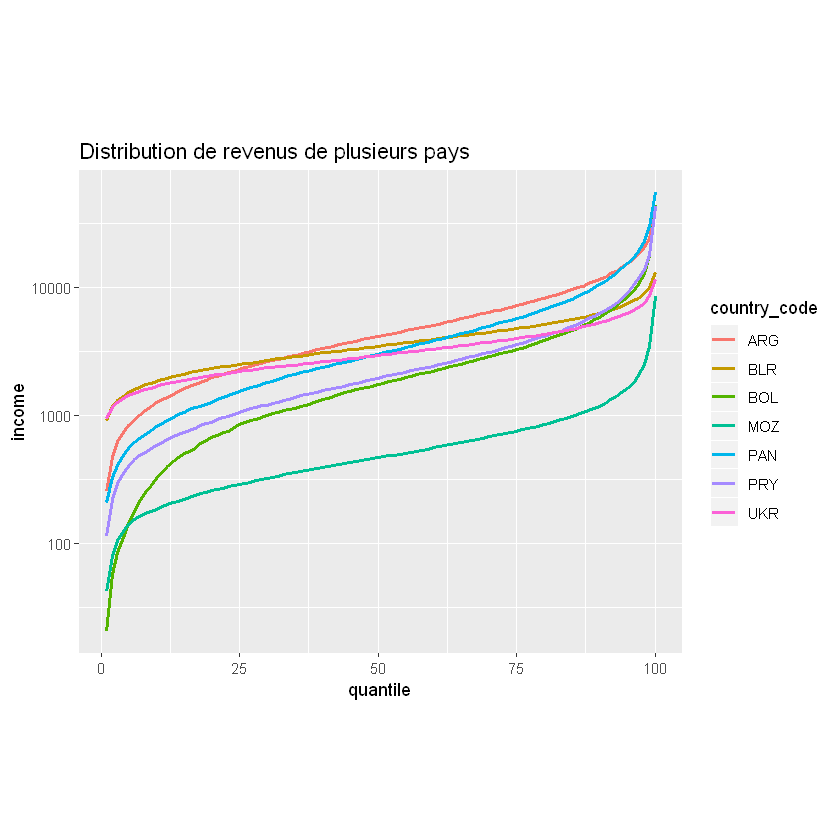

In [32]:
library(ggplot2)
qplot(x=quantile, 
      y=income,
      data=df_studied,
      geom='line',
      log='y',
      colour=country_code,
      main="Distribution de revenus de plusieurs pays",
      asp='0.8') +
      geom_line(size=1.0)

### Courbe de Lorenz

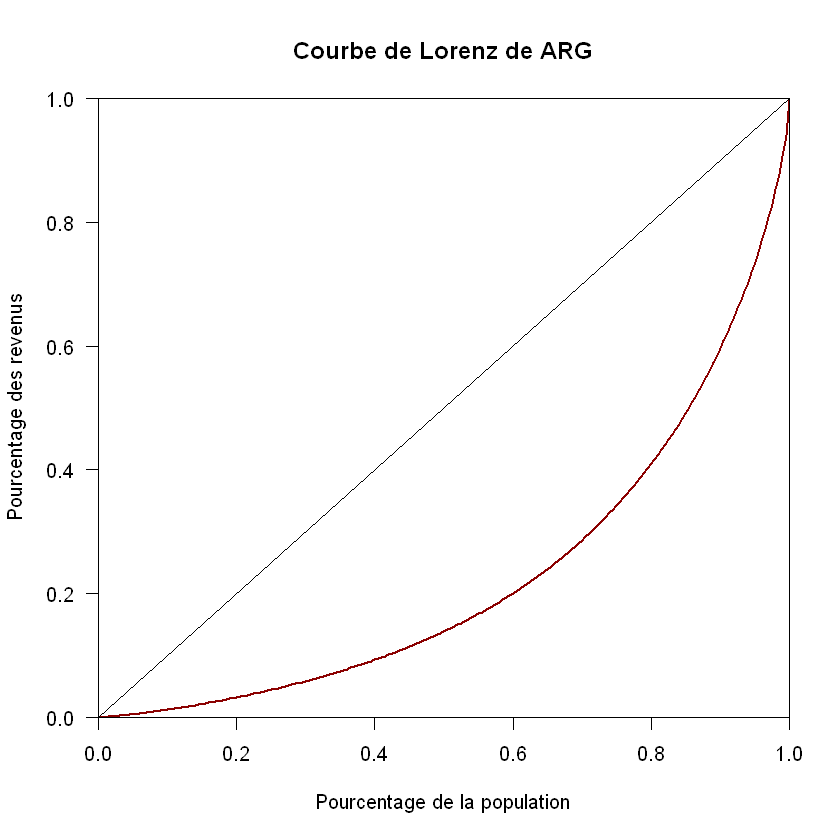

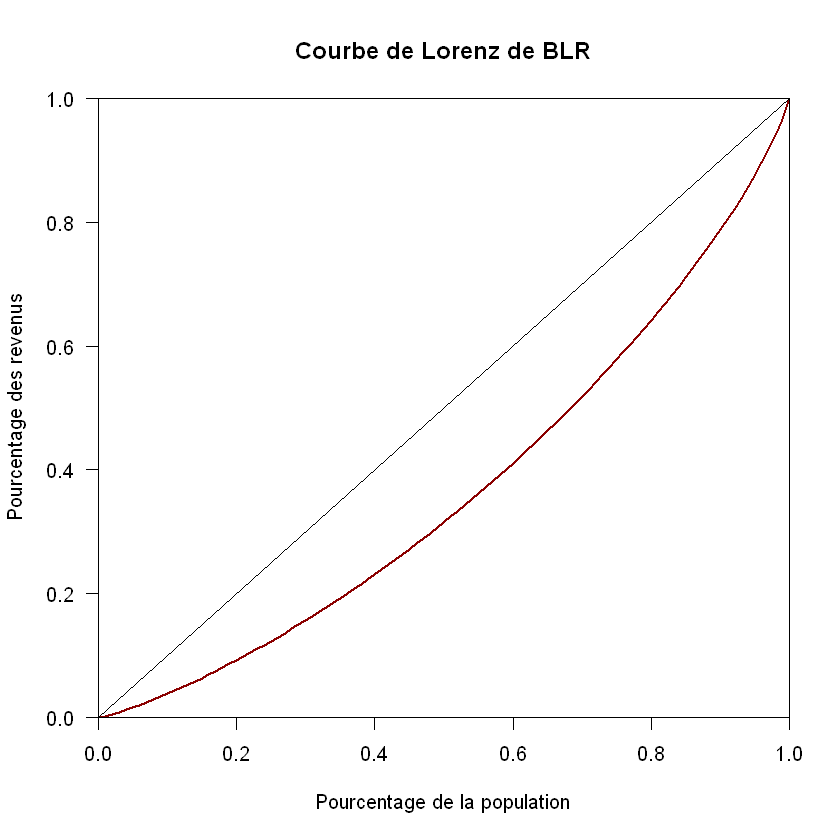

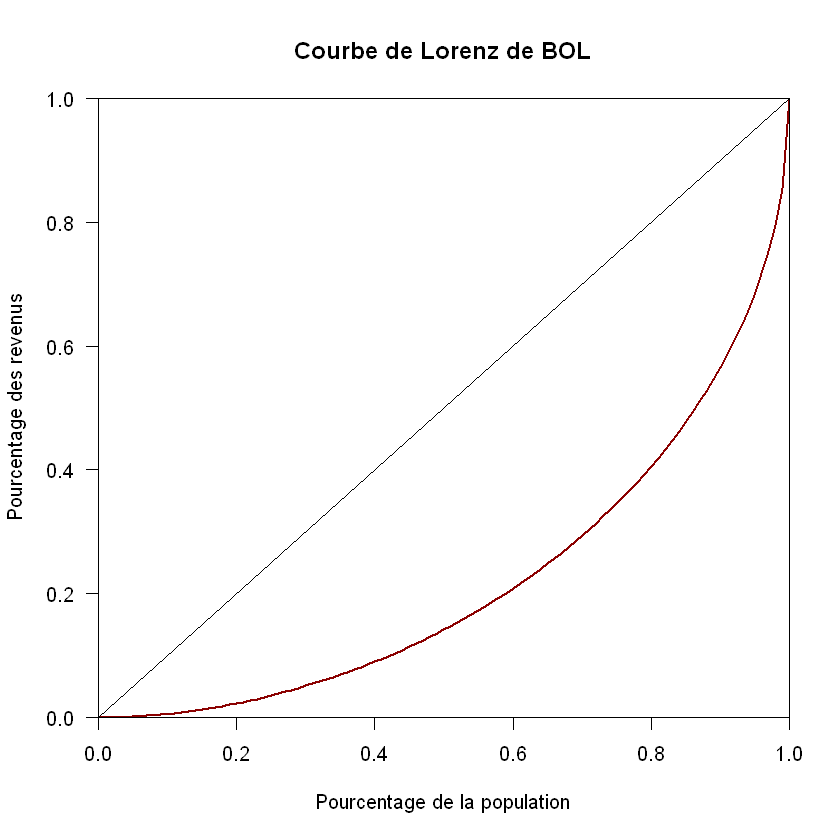

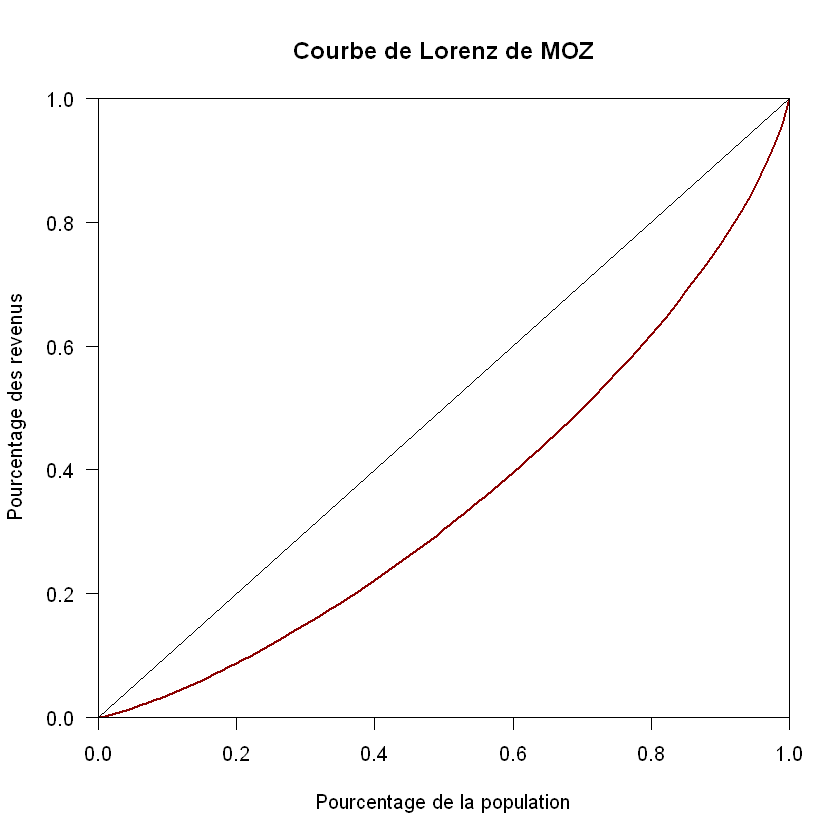

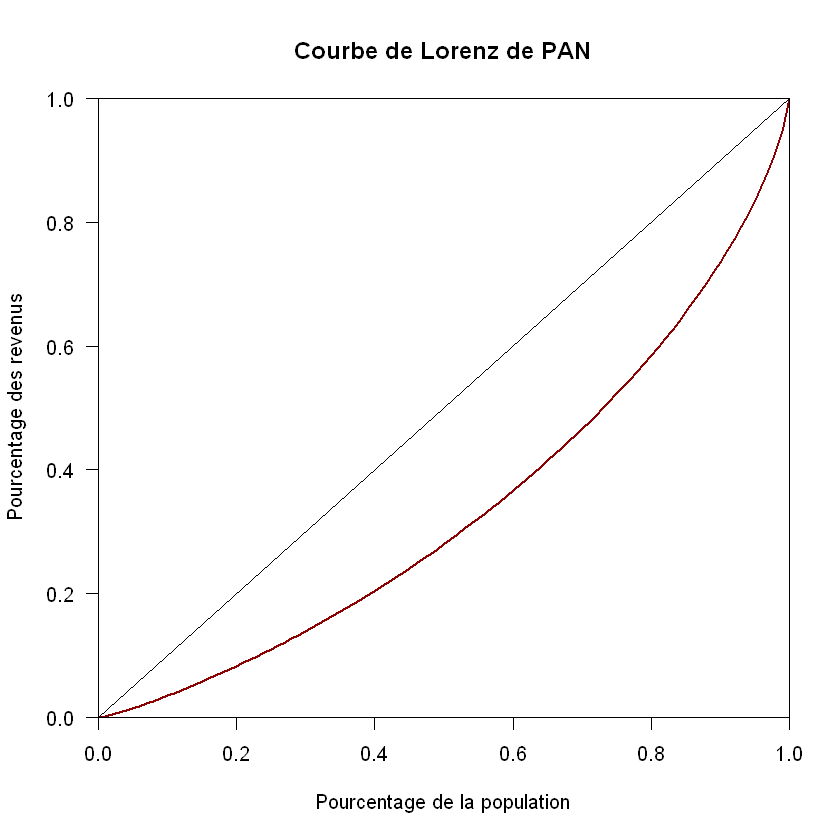

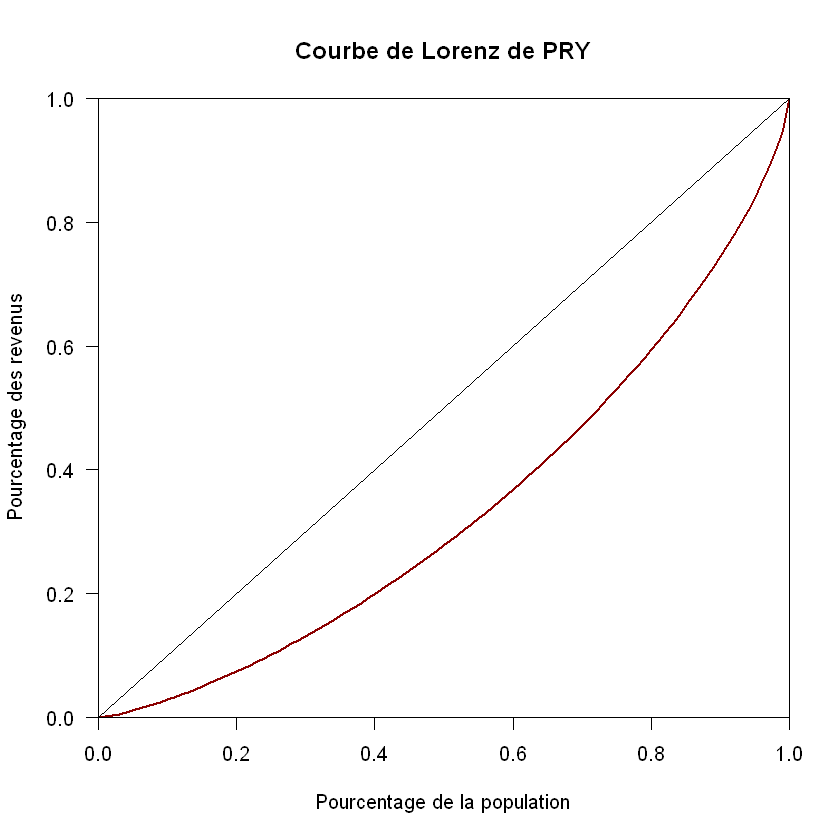

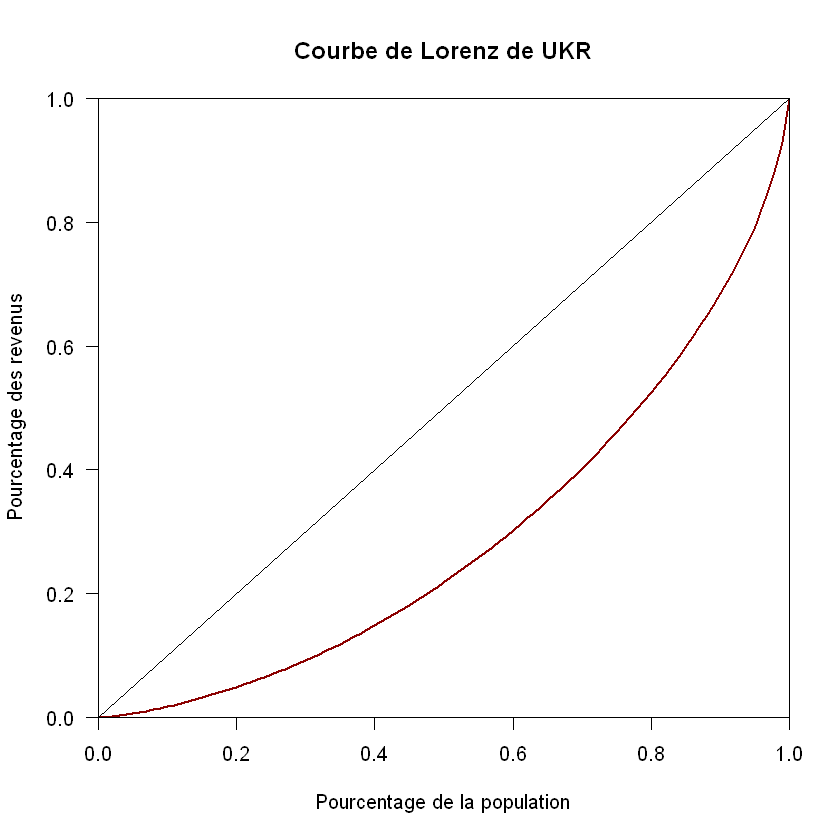

In [33]:
for(country_code in studied_country_codes){
    plot(Lc(df_income[df_all$country_code == country_code, 'income']), 
         col="darkred", 
         lwd=2,
         main = paste("Courbe de Lorenz de", country_code),
         xlab = "Pourcentage de la population",
         ylab = "Pourcentage des revenus"
        )
}

### Evolution de l'indice de Gini

In [34]:
# https://stackoverflow.com/questions/9531904/plot-multiple-columns-on-the-same-graph-in-r
library(tidyr)

df <- df_choosen[df_choosen$country_code %in% studied_country_codes,]
colnames(df) <- sub("true_gini", "", colnames(df)) # Utile pour le grahique
df <- gather(df, '2002', '2008', '2014', key="year", value="true_gini") # Les 3 colonnes en une, indispensable pour le grpahique
head(df, 10)

country_code,income_group,country_name,year,true_gini
ARG,High income,Argentina,2002,53.8
BLR,Upper middle income,Belarus,2002,30.3
BOL,Lower middle income,Bolivia,2002,59.3
MOZ,Low income,Mozambique,2002,47.0
PAN,High income,Panama,2002,56.2
PRY,Upper middle income,Paraguay,2002,57.3
UKR,Lower middle income,Ukraine,2002,29.0
ARG,High income,Argentina,2008,44.5
BLR,Upper middle income,Belarus,2008,27.8
BOL,Lower middle income,Bolivia,2008,50.8


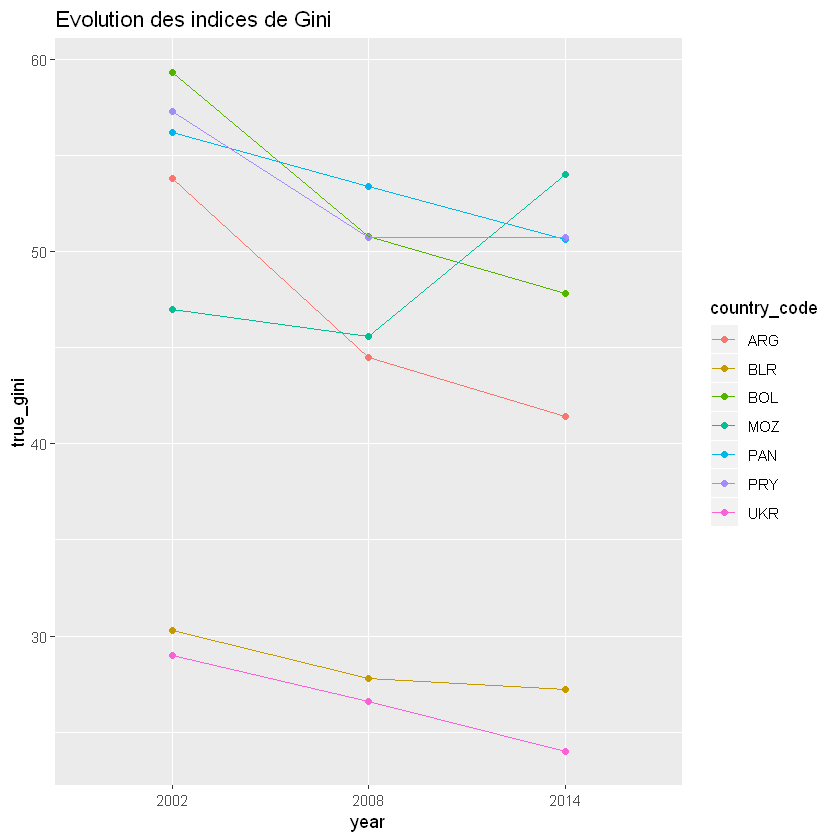

In [35]:
# https://stackoverflow.com/questions/9531904/plot-multiple-columns-on-the-same-graph-in-r
# https://stackoverflow.com/questions/27082601/ggplot2-line-chart-gives-geom-path-each-group-consist-of-only-one-observation
ggplot(df, 
       aes(year, true_gini, group= country_code, color=country_code)) + 
       geom_point() +
       geom_line() +
       labs(title="Evolution des indices de Gini")

### Classement des pays par indice de Gini

In [36]:
df <- df_all %>%
    group_by(country_code) %>%
    summarise(country_name=first(country_name), created_gini2008=first(created_gini2008)) %>%
    arrange(created_gini2008)

print("Les 5 pays ayant l'indice de Gini le plus élevé :")
print(tail(df))

print("Les 5 pays ayant l'indice de Gini le plus faible :")
print(head(df))

# https://stackoverflow.com/questions/21013198/return-row-numbers-for-a-particular-value-in-a-column-in-a-dataframe
print("La France se trouve en position : ")
print(which(df$country_code == 'FRA'))
df[df$country_code == 'FRA',]

[1] "Les 5 pays ayant l'indice de Gini le plus élevé :"
# A tibble: 6 x 3
  country_code country_name             created_gini2008
  <chr>        <chr>                               <dbl>
1 BOL          Bolivia                             0.561
2 CAF          Central African Republic            0.562
3 GTM          Guatemala                           0.568
4 COL          Colombia                            0.569
5 HND          Honduras                            0.602
6 ZAF          South Africa                        0.670
[1] "Les 5 pays ayant l'indice de Gini le plus faible :"
# A tibble: 6 x 3
  country_code country_name    created_gini2008
  <chr>        <chr>                      <dbl>
1 SVN          Slovenia                   0.231
2 SVK          Slovak Republic            0.247
3 CZE          Czech Republic             0.253
4 SWE          Sweden                     0.255
5 UKR          Ukraine                    0.255
6 DNK          Denmark                    0.260
[1] "La Fra

country_code,country_name,created_gini2008
FRA,France,0.3290962


## Partie 3

### Détermination du coefficient d'élasticité

In [37]:
# Ouvre le fichier et affiche toutes les lignes
file_name <- "Data/elasticity.txt"
conn <- file(file_name,open="r")
linn <-readLines(conn)
for (i in 1:length(linn)){
   print(linn[i])
}
close(conn)

[1] "Coefficients of intergenerational elasticity between parentsâ\200\231 and"
[1] "childrenâ\200\231s income"
[1] ""
[1] ""
[1] "                          | Base case  | Optimistic     | Pessimistic"
[1] "                          |            | (high mobility)| (low mobility)"
[1] "---------------------------------------------------------------------------"
[1] "Nordic European countries |    0.2     |      0.15      |    0.3"
[1] "and Canada                |            |                |"
[1] "---------------------------------------------------------------------------"
[1] "Europe (except nordic     |    0.4     |      0.3       |    0.5"
[1] "countries)                |            |                |"
[1] "---------------------------------------------------------------------------"
[1] "Australia/New Zealand/USA |    0.4     |      0.3       |    0.5"
[1] "---------------------------------------------------------------------------"
[1] "Asia                      |    0.5     |     

Les données du fichier "elasticity.txt" sont trop partielles. Je ne vais pas les utiliser.

Je vais donc préferer le jeu de données de la *Banque Mondiale*. Mon seul problème est que les données sont anciennes.

In [38]:
df_elas <- read.table(file="Data/GDIMMay2018.csv", sep=",", header=TRUE, stringsAsFactors=FALSE)
str(df_elas)
head(df_elas)

'data.frame':	6498 obs. of  66 variables:
 $ countryname      : chr  "Afghanistan" "Afghanistan" "Afghanistan" "Afghanistan" ...
 $ wbcode           : chr  "AFG" "AFG" "AFG" "AFG" ...
 $ iso3             : chr  "AFG" "AFG" "AFG" "AFG" ...
 $ region           : chr  "South Asia" "South Asia" "South Asia" "South Asia" ...
 $ incgroup2        : chr  "Developing economies" "Developing economies" "Developing economies" "Developing economies" ...
 $ incgroup4        : chr  "Low income" "Low income" "Low income" "Low income" ...
 $ fragile          : int  1 1 1 1 1 1 1 1 1 1 ...
 $ survey           : chr  "NRVA" "NRVA" "NRVA" "NRVA" ...
 $ year             : int  1980 1980 1980 1980 1980 1980 1980 1980 1980 1980 ...
 $ status           : chr  "Co-residents only" "Co-residents only" "Co-residents only" "Co-residents only" ...
 $ cohort           : int  1980 1980 1980 1980 1980 1980 1980 1980 1980 1980 ...
 $ parent           : chr  "avg" "avg" "avg" "dad" ...
 $ child            : chr  "all" "

countryname,wbcode,iso3,region,incgroup2,incgroup4,fragile,survey,year,status,...,Cores2125_MAcatC1,Shortfall0611_obs,Shortfall0611_IGP,Shortfall1217_obs,Shortfall1217_IGP,IGEincome,S1,S2,S3,MLD_psu
Afghanistan,AFG,AFG,South Asia,Developing economies,Low income,1,NRVA,1980,Co-residents only,...,NA,25103,0.08619742,18054,0.3452242,NA,NA,NA,NA,0.1
Afghanistan,AFG,AFG,South Asia,Developing economies,Low income,1,NRVA,1980,Co-residents only,...,NA,12107,0.08327112,8538,0.3899521,NA,NA,NA,NA,0.1
Afghanistan,AFG,AFG,South Asia,Developing economies,Low income,1,NRVA,1980,Co-residents only,...,NA,12996,0.08916077,9516,0.3076873,NA,NA,NA,NA,0.1
Afghanistan,AFG,AFG,South Asia,Developing economies,Low income,1,NRVA,1980,Co-residents only,...,NA,25396,0.05044683,18387,0.2180616,NA,NA,NA,NA,0.1
Afghanistan,AFG,AFG,South Asia,Developing economies,Low income,1,NRVA,1980,Co-residents only,...,NA,12246,0.04796100,8677,0.2309089,NA,NA,NA,NA,0.1
Afghanistan,AFG,AFG,South Asia,Developing economies,Low income,1,NRVA,1980,Co-residents only,...,NA,13150,0.05288147,9710,0.2093361,NA,NA,NA,NA,0.1


In [39]:
# Vérifier qu'il n'y a qu'un unique coefficient d'élasticité pour tous les pays
summary(df_elas$IGEincome)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.113   0.313   0.464   0.517   0.690   1.095    5645 

In [40]:
# Selon le document de la banque mondiale, je devrai obtenir 70 pays avec des données
df_elas <- df_elas[!is.na(df_elas$IGEincome),]
str(df_elas[!is.na(df_elas$IGEincome),])

'data.frame':	853 obs. of  66 variables:
 $ countryname      : chr  "Albania" "Albania" "Albania" "Albania" ...
 $ wbcode           : chr  "ALB" "ALB" "ALB" "ALB" ...
 $ iso3             : chr  "ALB" "ALB" "ALB" "ALB" ...
 $ region           : chr  "Europe & Central Asia" "Europe & Central Asia" "Europe & Central Asia" "Europe & Central Asia" ...
 $ incgroup2        : chr  "Developing economies" "Developing economies" "Developing economies" "Developing economies" ...
 $ incgroup4        : chr  "Upper middle income" "Upper middle income" "Upper middle income" "Upper middle income" ...
 $ fragile          : int  0 0 0 0 0 0 0 0 0 0 ...
 $ survey           : chr  "LITS" "LITS" "LITS" "LITS" ...
 $ year             : int  1970 1970 1970 1970 1970 1970 1970 1970 1970 1970 ...
 $ status           : chr  "Retrospective question" "Retrospective question" "Retrospective question" "Retrospective question" ...
 $ cohort           : int  1970 1970 1970 1970 1970 1970 1970 1970 1970 1970 ...
 $ par

In [41]:
df_elas <- df_elas %>%
    group_by(iso3) %>%
    summarise(coeff_elas=first(IGEincome))

str(df_elas)
summary(df_elas)

Classes 'tbl_df', 'tbl' and 'data.frame':	75 obs. of  2 variables:
 $ iso3      : chr  "ALB" "AUS" "AUT" "BEL" ...
 $ coeff_elas: num  0.816 0.275 0.245 0.183 0.855 ...


     iso3             coeff_elas    
 Length:75          Min.   :0.1129  
 Class :character   1st Qu.:0.3213  
 Mode  :character   Median :0.4641  
                    Mean   :0.5154  
                    3rd Qu.:0.6833  
                    Max.   :1.0954  

In [42]:
colnames(df_elas)[1] <- 'country_code'
df_all <- inner_join(df_all, df_elas, by='country_code')

print("Nombre de pays dorénavant étudiés : ")
print(length(unique(df_all$country_code)))
head(df_all)

[1] "Nombre de pays dorénavant étudiés : "
[1] 65


country_code,year_survey,quantile,nb_quantiles,income,gdpppp,created_gini2008,country_name,true_gini2002,true_gini2008,true_gini2014,region,income_group,code_pays,pays,population,coeff_elas
ALB,2008,1,100,728.8980,7297,0.3046243,Albania,31.7,30,NA,Europe & Central Asia,Upper middle income,3,Albanie,2991651,0.8158745
ALB,2008,2,100,916.6623,7297,0.3046243,Albania,31.7,30,NA,Europe & Central Asia,Upper middle income,3,Albanie,2991651,0.8158745
ALB,2008,3,100,1010.9160,7297,0.3046243,Albania,31.7,30,NA,Europe & Central Asia,Upper middle income,3,Albanie,2991651,0.8158745
ALB,2008,4,100,1086.9078,7297,0.3046243,Albania,31.7,30,NA,Europe & Central Asia,Upper middle income,3,Albanie,2991651,0.8158745
ALB,2008,5,100,1132.6997,7297,0.3046243,Albania,31.7,30,NA,Europe & Central Asia,Upper middle income,3,Albanie,2991651,0.8158745
ALB,2008,6,100,1171.1412,7297,0.3046243,Albania,31.7,30,NA,Europe & Central Asia,Upper middle income,3,Albanie,2991651,0.8158745


### Génération aléatoire de la classe de revenu des parents

Nous disposons déjà du revenu moyen $m_{j}$ de chaque pays $j$ (champ "gdpppp") et de l'indice de Gini.

In [43]:
generate_incomes <- function(n, pj){
    # On génère les revenus des parents (exprimés en logs) selon une loi normale.
    # La moyenne et variance n'ont aucune incidence sur le résultat final (ie. sur le caclul de la classe de revenu)
    ln_y_parent = rnorm(n, 0, 1)
    # Génération d'une réalisation du terme d'erreur epsilon
    residues = rnorm(n, 0, 1)
    y_child <- exp(pj* ln_y_parent + residues)
    y_parents <- exp(ln_y_parent)
    result <- list(y_child=y_child, y_parents=y_parents)
    return(result)
}

set.seed(1)              # Graine RNG
pj = 0.9                 # coefficient d'élasticité du pays j
nb_quantiles = 100       # nombre de quantiles (nombre de classes de revenu)
n  = 1000*nb_quantiles   # taille de l'échantillon

result <- generate_incomes(n, pj)
y_child <- result$y_child
y_parents <- result$y_parents

print("y_child :")
length(y_child)
summary(y_child)

print("y_parents :")
length(y_parents)
summary(y_parents)

[1] "y_child :"


[1] 100000

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
  0.0024   0.4040   0.9999   2.4738   2.4661 315.7909 

[1] "y_parents :"


[1] 100000

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
 0.01065  0.50598  1.00080  1.64833  1.95809 74.71050 

In [44]:
quantiles <- function(l, nb_quantiles){
    size <- length(l)
    l_sorted <- sort(l)
    quantiles = seq(0, nb_quantiles, length.out=size)
    quantiles[1] <- 1
    quantiles <- ceiling(quantiles)
    # q_dict = {a:int(b) for a,b in zip(l_sorted,quantiles)}
    q_frame <- data.frame(l_sorted, quantiles)
    # return pd.Series([q_dict[e] for e in l])
    l_frame <- data.frame(l)
    q_frame <- inner_join(l_frame, q_frame, by=c("l" = "l_sorted"))
    return(q_frame$quantiles)
}

compute_quantiles <- function(y_child, y_parents, nb_quantiles){
    # y_child = pd.Series(y_child)
    # y_parents = pd.Series(y_parents)
    c_i_child = quantiles(y_child, nb_quantiles)
    c_i_parent = quantiles(y_parents, nb_quantiles)
    sample = data.frame(y_child, y_parents, c_i_child, c_i_parent)
    colnames(sample) = c('y_child', 'y_parents', 'c_i_child', 'c_i_parent')
    return(sample)
}             
                      
sample = compute_quantiles(y_child, y_parents, nb_quantiles)
head(sample)
str(sample)
summary(sample)

y_child,y_parents,c_i_child,c_i_parent
1.2556246,0.5344838,57,27
1.7462086,1.2015872,67,58
0.2938362,0.4336018,19,21
2.6586037,4.9297132,77,95
1.1370362,1.3902836,54,63
0.8583462,0.4402254,46,21


'data.frame':	100000 obs. of  4 variables:
 $ y_child   : num  1.256 1.746 0.294 2.659 1.137 ...
 $ y_parents : num  0.534 1.202 0.434 4.93 1.39 ...
 $ c_i_child : num  57 67 19 77 54 46 35 69 53 65 ...
 $ c_i_parent: num  27 58 21 95 63 21 69 78 72 39 ...


    y_child           y_parents          c_i_child        c_i_parent    
 Min.   :  0.0024   Min.   : 0.01065   Min.   :  1.00   Min.   :  1.00  
 1st Qu.:  0.4040   1st Qu.: 0.50598   1st Qu.: 25.75   1st Qu.: 25.75  
 Median :  0.9999   Median : 1.00080   Median : 50.50   Median : 50.50  
 Mean   :  2.4738   Mean   : 1.64833   Mean   : 50.50   Mean   : 50.50  
 3rd Qu.:  2.4661   3rd Qu.: 1.95809   3rd Qu.: 75.25   3rd Qu.: 75.25  
 Max.   :315.7909   Max.   :74.71050   Max.   :100.00   Max.   :100.00  

In [45]:
# https://stackoverflow.com/questions/44906194/how-to-compute-the-conditional-probability-in-r
cd_proba <- sample %>%
    count(c_i_child, c_i_parent) %>%
    group_by(c_i_child) %>%
    mutate(proba = n / sum(n))

cd_proba

c_i_child,c_i_parent,n,proba
1,1,233,0.233
1,2,108,0.108
1,3,97,0.097
1,4,78,0.078
1,5,59,0.059
1,6,51,0.051
1,7,33,0.033
1,8,33,0.033
1,9,25,0.025
1,10,23,0.023


Si je fais la somme des probabilités selon la classe des enfants, j'obtiens à chaque fois le nombre 1. Ceci laisse à penser que mes calculs sont bons.

In [46]:
proba_cond <- function(c_i_parent, c_i_child, df){
    return(df[(df$c_i_child == c_i_child & df$c_i_parent == c_i_parent), 'proba'][[1]])
}

c_i_child = 5 
c_i_parent = 8
p = proba_cond(c_i_parent, c_i_child, cd_proba) # double condition
cat("\nP(c_i_parent = ", c_i_parent, " | c_i_child = ", c_i_child, " pj = ", pj, ") = ", p)


P(c_i_parent =  8  | c_i_child =  5  pj =  0.9 ) =  0.038

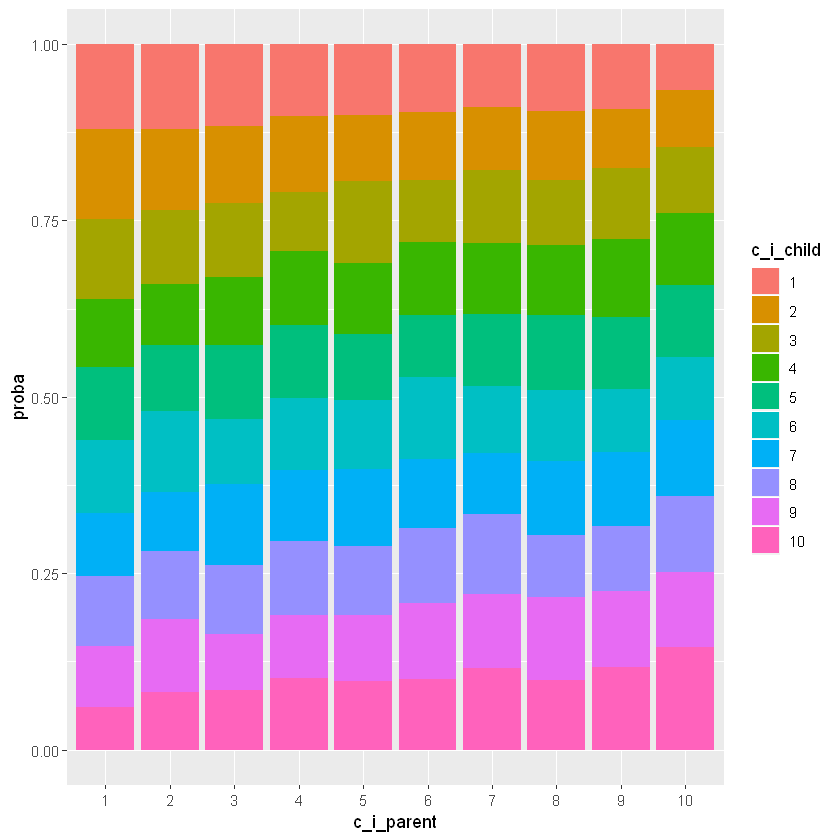

In [47]:
plot_conditional_distributions <- function(pj, nb_quantiles){
    n  = 1000*nb_quantiles   # taille de l'échantillon
    
    result <- generate_incomes(n, pj)
    y_child <- result$y_child
    y_parents <- result$y_parents
    
    sample = compute_quantiles(y_child, y_parents, nb_quantiles)
    
    cd_proba <- sample %>%
    count(c_i_child, c_i_parent) %>%
    group_by(c_i_child) %>%
    mutate(proba = n / sum(n))
    
    # To have a clean plot
    cd_proba$c_i_child <- as.factor(cd_proba$c_i_child)
    cd_proba$c_i_parent <- as.factor(cd_proba$c_i_parent)
    
    cd_plot <-ggplot(cd_proba, aes(fill=c_i_child, y=proba, x=c_i_parent)) + 
        geom_bar( stat="identity")
    
    return(cd_plot)
}

# Forte mobilité
plot_conditional_distributions(0.1, 10)

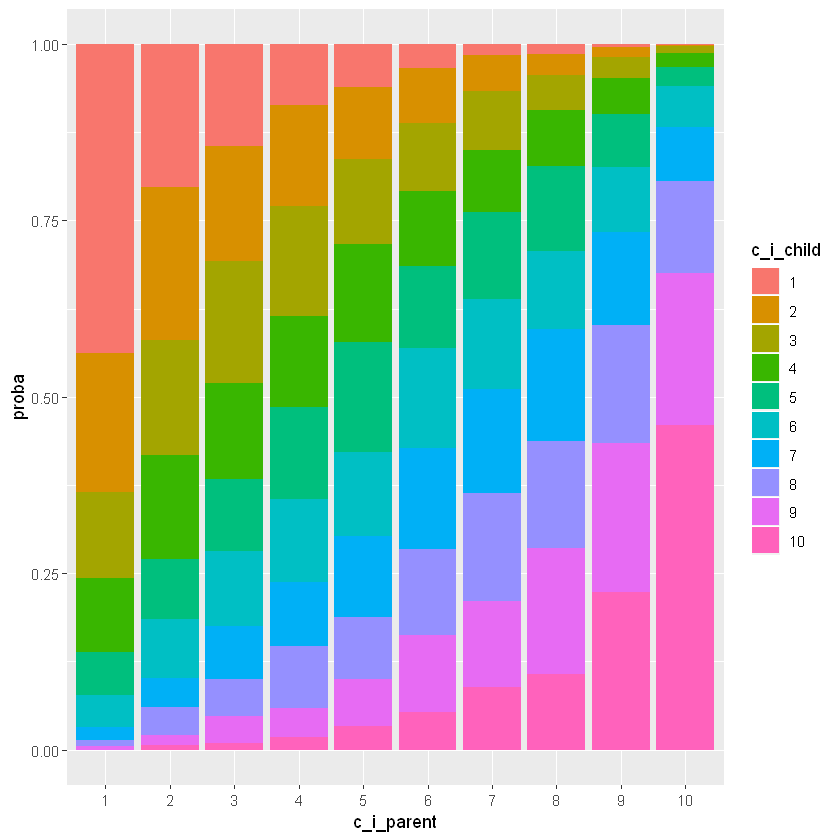

In [48]:
# Faible mobilité
plot_conditional_distributions(0.9, 10)

In [49]:
nb_quantiles = 100  # nombre de quantiles (nombre de classes de revenu)
n  = 500*100        # taille de l'échantillon

# Création de la Dataframe qui va me servir pour la modélisation
colnames_df_model <- c('country_code', 
                       'country_name', 
                       'gdpppp', 
                       'created_gini2008',
                       'coeff_elas',
                       'y_child', 
                       'y_parents', 
                       'c_i_child', 
                       'c_i_parent')

df_model <- data.frame(matrix(vector(),ncol=length(colnames_df_model)))
colnames(df_model) <- colnames_df_model

# Création de 500 individus pour chaque quantile de chaque pays
for(country in unique(df_all$country_code)) {
    
    subset <- df_all[df_all$country_code == country,]
    pj <- subset[1, 'coeff_elas']  # coefficient d'élasticité du pays j

    result <- generate_incomes(n, pj)
    y_child <- result$y_child
    y_parents <- result$y_parents
    
    # Calcul de la classe de revenu c_i_child
    sample <- compute_quantiles(y_child, y_parents, nb_quantiles)
    
    # Ajout des différentes colonnes nécessaires à la partie 4
    sample$country_code <- subset[1, 'country_code']
    sample$country_name <- subset[1, 'country_name']
    sample$gdpppp <- subset[1, 'gdpppp']
    sample$created_gini2008 <- subset[1, 'created_gini2008']
    sample$coeff_elas <- pj
    
    # Ajout de sample à df_model
    df_model <- rbind(df_model, sample)
}

# Remise en ordre des colonnes
df_model <- df_model[colnames_df_model]

# Pour voir si tout s'est bien passé
head(df_model)
str(df_model)
summary(df_model)

country_code,country_name,gdpppp,created_gini2008,coeff_elas,y_child,y_parents,c_i_child,c_i_parent
ALB,Albania,7297,0.3046243,0.8158745,0.2934246,1.3176180,18,61
ALB,Albania,7297,0.3046243,0.8158745,0.6897654,0.4711007,39,23
ALB,Albania,7297,0.3046243,0.8158745,4.0699248,2.1925014,87,79
ALB,Albania,7297,0.3046243,0.8158745,19.9699338,3.4805191,99,90
ALB,Albania,7297,0.3046243,0.8158745,0.9761746,1.1930588,50,58
ALB,Albania,7297,0.3046243,0.8158745,1.8739185,0.6488209,69,34


'data.frame':	3250000 obs. of  9 variables:
 $ country_code    : chr  "ALB" "ALB" "ALB" "ALB" ...
 $ country_name    : chr  "Albania" "Albania" "Albania" "Albania" ...
 $ gdpppp          : num  7297 7297 7297 7297 7297 ...
 $ created_gini2008: num  0.305 0.305 0.305 0.305 0.305 ...
 $ coeff_elas      : num  0.816 0.816 0.816 0.816 0.816 ...
 $ y_child         : num  0.293 0.69 4.07 19.97 0.976 ...
 $ y_parents       : num  1.318 0.471 2.193 3.481 1.193 ...
 $ c_i_child       : num  18 39 87 99 50 69 85 50 7 84 ...
 $ c_i_parent      : num  61 23 79 90 58 34 64 81 5 87 ...


 country_code       country_name           gdpppp        created_gini2008
 Length:3250000     Length:3250000     Min.   :  728.8   Min.   :0.2307  
 Class :character   Class :character   1st Qu.: 3286.0   1st Qu.:0.3028  
 Mode  :character   Mode  :character   Median :11651.0   Median :0.3377  
                                       Mean   :16440.2   Mean   :0.3677  
                                       3rd Qu.:28170.0   3rd Qu.:0.4269  
                                       Max.   :73127.0   Max.   :0.6698  
   coeff_elas        y_child           y_parents           c_i_child     
 Min.   :0.1129   Min.   :  0.0018   Min.   :  0.00439   Min.   :  1.00  
 1st Qu.:0.3400   1st Qu.:  0.4655   1st Qu.:  0.51004   1st Qu.: 25.75  
 Median :0.4641   Median :  1.0003   Median :  1.00024   Median : 50.50  
 Mean   :0.5155   Mean   :  1.9676   Mean   :  1.64937   Mean   : 50.50  
 3rd Qu.:0.6704   3rd Qu.:  2.1503   3rd Qu.:  1.96409   3rd Qu.: 75.25  
 Max.   :1.0954   Max.   :868.3823   M

In [50]:
# Il me manque la variable à prédire
# Ajout du revenu des enfants
df_model <- left_join(df_model, 
                      df_all[,c('country_code', 'quantile', 'income')], 
                      by=c("country_code" = "country_code", 
                           "c_i_child" = "quantile"
                          )
                     )
colnames(df_model)[which(names(df_model) == "income")] <- "income_child"

# Ajout du revenu des parents
df_model <- left_join(df_model, 
                      df_all[,c('country_code', 'quantile', 'income')], 
                      by=c("country_code" = "country_code", 
                           "c_i_parent" = "quantile"
                          )
                     )
colnames(df_model)[which(names(df_model) == "income")] <- "income_parent"

# Supression des variables inutiles
df_model$c_i_child <- NULL
df_model$y_child <- NULL
df_model$y_parents <- NULL

# Vérifications
head(df_model)
str(df_model)
summary(df_model)

country_code,country_name,gdpppp,created_gini2008,coeff_elas,c_i_parent,income_child,income_parent
ALB,Albania,7297,0.3046243,0.8158745,61,1604.857,2853.722
ALB,Albania,7297,0.3046243,0.8158745,23,2170.274,1765.328
ALB,Albania,7297,0.3046243,0.8158745,79,4477.963,3747.268
ALB,Albania,7297,0.3046243,0.8158745,90,9351.751,4773.785
ALB,Albania,7297,0.3046243,0.8158745,58,2493.837,2760.319
ALB,Albania,7297,0.3046243,0.8158745,34,3181.626,2026.207


'data.frame':	3250000 obs. of  8 variables:
 $ country_code    : chr  "ALB" "ALB" "ALB" "ALB" ...
 $ country_name    : chr  "Albania" "Albania" "Albania" "Albania" ...
 $ gdpppp          : num  7297 7297 7297 7297 7297 ...
 $ created_gini2008: num  0.305 0.305 0.305 0.305 0.305 ...
 $ coeff_elas      : num  0.816 0.816 0.816 0.816 0.816 ...
 $ c_i_parent      : num  61 23 79 90 58 34 64 81 5 87 ...
 $ income_child    : num  1605 2170 4478 9352 2494 ...
 $ income_parent   : num  2854 1765 3747 4774 2760 ...


 country_code       country_name           gdpppp        created_gini2008
 Length:3250000     Length:3250000     Min.   :  728.8   Min.   :0.2307  
 Class :character   Class :character   1st Qu.: 3286.0   1st Qu.:0.3028  
 Mode  :character   Mode  :character   Median :11651.0   Median :0.3377  
                                       Mean   :16440.2   Mean   :0.3677  
                                       3rd Qu.:28170.0   3rd Qu.:0.4269  
                                       Max.   :73127.0   Max.   :0.6698  
   coeff_elas       c_i_parent      income_child       income_parent      
 Min.   :0.1129   Min.   :  1.00   Min.   :    16.72   Min.   :    16.72  
 1st Qu.:0.3400   1st Qu.: 25.75   1st Qu.:  1095.80   1st Qu.:  1095.80  
 Median :0.4641   Median : 50.50   Median :  3901.56   Median :  3901.56  
 Mean   :0.5155   Mean   : 50.50   Mean   :  8146.72   Mean   :  8146.72  
 3rd Qu.:0.6704   3rd Qu.: 75.25   3rd Qu.: 11889.92   3rd Qu.: 11889.92  
 Max.   :1.0954   Max.   :100.00

#### Explication choix du dataframe final

In [51]:
# Nombre de pays étudiés
length(unique(df_model[,'country_code']))

[1] 65

In [52]:
# Vérification du nombre d'individus
65 * 500 * 100

[1] 3250000

Nous étudierons 65 pays grâce à 3,25 millions d'individus dans le modèle final. Celui-ci contient les indice de Gini que j'ai recrée moi-même afin d'avoir plus de pays.

## Partie 4
#### Préparation des données

In [53]:
# Logarithme népérien
df_ln_model <- df_model
df_ln_model[, c('gdpppp', 'income_child', 'income_parent')] <- log(df_ln_model[c('gdpppp', 'income_child', 'income_parent')])

# Vérification de la transformation
head(df_ln_model)
head(df_model)

country_code,country_name,gdpppp,created_gini2008,coeff_elas,c_i_parent,income_child,income_parent
ALB,Albania,8.895219,0.3046243,0.8158745,61,7.380790,7.956380
ALB,Albania,8.895219,0.3046243,0.8158745,23,7.682609,7.476092
ALB,Albania,8.895219,0.3046243,0.8158745,79,8.406924,8.228782
ALB,Albania,8.895219,0.3046243,0.8158745,90,9.143319,8.470895
ALB,Albania,8.895219,0.3046243,0.8158745,58,7.821578,7.923101
ALB,Albania,8.895219,0.3046243,0.8158745,34,8.065148,7.613921


country_code,country_name,gdpppp,created_gini2008,coeff_elas,c_i_parent,income_child,income_parent
ALB,Albania,7297,0.3046243,0.8158745,61,1604.857,2853.722
ALB,Albania,7297,0.3046243,0.8158745,23,2170.274,1765.328
ALB,Albania,7297,0.3046243,0.8158745,79,4477.963,3747.268
ALB,Albania,7297,0.3046243,0.8158745,90,9351.751,4773.785
ALB,Albania,7297,0.3046243,0.8158745,58,2493.837,2760.319
ALB,Albania,7297,0.3046243,0.8158745,34,3181.626,2026.207


In [54]:
# Affichage de tous les objets en mémoire
ls()

[1] "c_i_child"                      "c_i_parent"                    
 [3] "cd_proba"                       "colnames_df_model"             
 [5] "compute_quantiles"              "conn"                          
 [7] "country"                        "country_code"                  
 [9] "df"                             "df_all"                        
[11] "df_choosen"                     "df_elas"                       
[13] "df_gini"                        "df_gp_pays"                    
[15] "df_income"                      "df_ln_model"                   
[17] "df_model"                       "df_mt_gini"                    
[19] "df_pop"                         "df_studied"                    
[21] "duplicates_china"               "file_name"                     
[23] "generate_incomes"               "i"                             
[25] "linn"                           "n"                             
[27] "nb_quantiles"                   "nb_unique_values"              
[29] "p"                              "pj"                            
[31] "plot_conditional_distributions" "proba_cond"                    
[33] "quantiles"                      "result"                        
[35] "sample"                         "studied_country_codes"         
[37] "subset"                         "world_pop"                     
[39] "y_child"                        "y_parents"

In [55]:
# Nettoyage mémoire
rm(list = c('df', 'df_all', 'df_choosen', 'df_elas', 'df_gini', 'df_gp_pays', 'df_income', 'df_mt_gini', 'df_pop', 'df_studied', 'subset'))
rm(country_aov, ln_country_aov)
gc()

Warning message in rm(country_aov, ln_country_aov):
"objet 'country_aov' introuvable"Warning message in rm(country_aov, ln_country_aov):
"objet 'ln_country_aov' introuvable"

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,808442,43.2,1563521,83.6,1563521,83.6
Vcells,37929494,289.4,101715743,776.1,101715743,776.1


### Anova (variable explicative = pays de l'individu)

L'analyse de variance (ANOVA) sert à déterminer si les moyennes de plusieurs groupes sont différentes. L'ANOVA utilise le test F pour déterminer si la variabilité entre les moyennes des groupes est supérieure à la variabilité des observations au sein des groupes. Si ce rapport est suffisamment grand, nous pouvons en conclure que tous les moyennes ne sont pas égales.

Trois hypothèses doivent être vérifiées pour qu'une ANOVA à un facteur soit valide :
>- les réponses observées, pour une modalité donnée du facteur étudié, doivent être indépendantes les unes des autres, et indépendantes des réponses des autres modalités.
>- les résidus doivent être distribués selon une loi Normale, de moyenne 0.
>- les résidus doivent être distribués de façon homogène. Autrement dit, les variances des résidus relatives aux différentes modalités de la variable explicative (ou indépendante) ne doivent pas être trop différentes.

La première hypothèse est déjà vérifiée.

Sources :
- http://www.sthda.com/french/wiki/anova-analyse-de-variance-avec-r
- http://www.sthda.com/english/wiki/one-way-anova-test-in-r
- https://eric.univ-lyon2.fr/~ricco/cours/slides/ANOVA.pdf
- https://statistique-et-logiciel-r.com/anova-a-un-facteur-quand-les-hypotheses-ne-sont-pas-satisfaites/

#### Application de l'ANOVA

- H0 : Les moyennes revenus des centiles entre les différentes pays sont sensiblement équivalentes
- Ha : Les moyennes des centiles entre les différentes pays sont significativement différentes.

[1] "Données originales"


Loading required package: carData

Attaching package: 'car'

The following object is masked from 'package:dplyr':

    recode

Warning message in leveneTest.default(y = y, group = group, ...):
"group coerced to factor."

,Df,F value,Pr(>F)
group,64,11406.24,0
,3249935,NA,NA


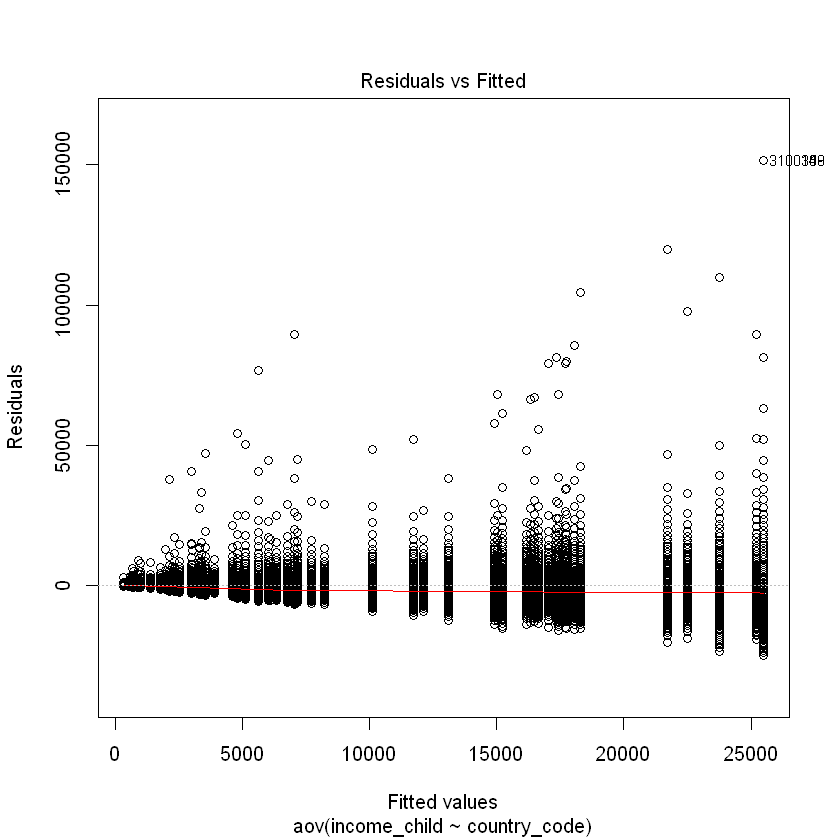

In [56]:
# Compute the analysis of variance
country_aov <- aov(income_child ~ country_code, data=df_model)

# Pas de log appliqué
print("Données originales")

# Test of Homogeneity of variances
# Levene’s test
library(car)
leveneTest(income_child ~ country_code, data=df_model)
# Residual vs fitted
plot(country_aov, 1)

L'hypothèse nulle pour le test de Levene est que les groupes que nous comparons ont tous des variances similaires. Nous utilisons le test de Levene au lieu de celui de Bartlett car ce dernier est moins robuste. Ici la valeur-p étant inférieure à 0,1%, l'hypothèse nulle est rejetée, les variances des groupes sont significativement différentes. Par conséquent, les résultats de l'ANOVA ne seront pas pertinents.

D'autre part, le graphique "Residuals vs Fitted" montre les résidus sur l'axe des ordonnées et les valeurs prédites sur l'axe des abscisses. Si la variance de chaque groupe est égale, le graphique ne doit montrer aucune tendance. En d'autres termes, un nuage de points aléatoire doit apparaître. Malheureusement, le graphique montre que les variances sont hétérogènes car les résidus sont ne sont pas distribués de la même manière en-dessous et au-dessus de zéro.

Sources :
- https://en.wikipedia.org/wiki/Levene%27s_test
- https://yieldingresults.org/wp-content/uploads/2015/03/Checking_ANOVA_assumptions.html
- https://biostats.w.uib.no/test-for-homogeneity-of-variances-levenes-test/
- https://stats.stackexchange.com/questions/211379/residual-analysis-and-anova-model

Warning message in ks.test(x = residuals(object = country_aov), y = "pnorm", alternative = "two.sided"):
"ties should not be present for the Kolmogorov-Smirnov test"


	One-sample Kolmogorov-Smirnov test

data:  residuals(object = country_aov)
D = 0.65087, p-value < 2.2e-16
alternative hypothesis: two-sided


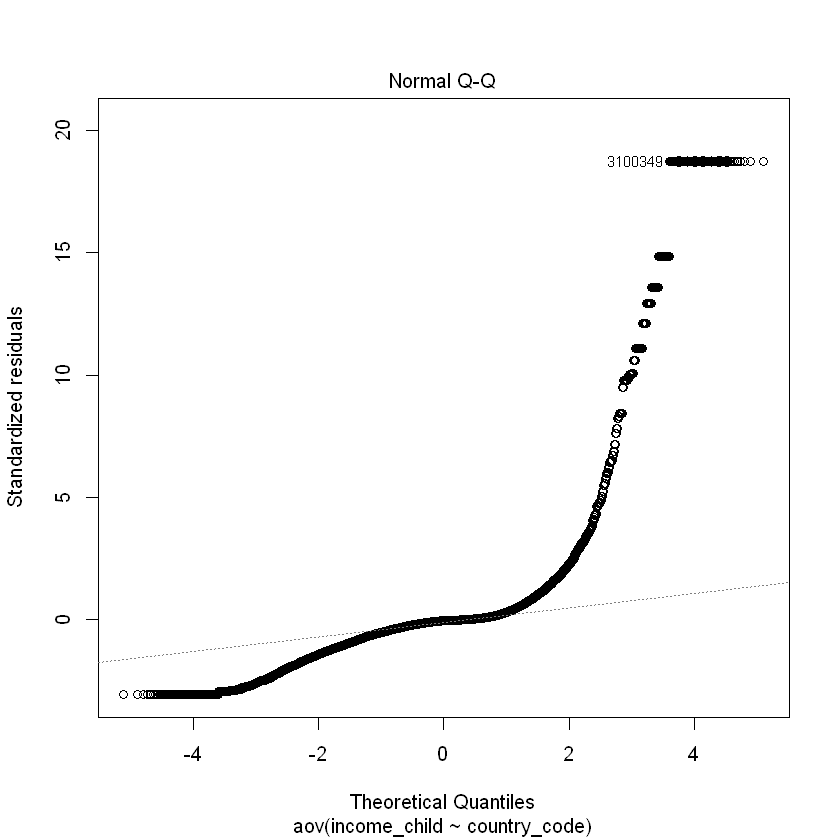

In [57]:
# Check the normality assumption
# Run Kolmogorov-Smirnov test
ks.test(x = residuals(object = country_aov),y='pnorm',alternative='two.sided')
# Quantiles of the residuals against the quantiles of the normal distribution
plot(country_aov, 2)

Le QQplot met en évidence un défaut de normalité,  tout comme le test de Kolmogorov-Smirnov qui rejette l’hypothèse de normalité. 

Sources : 
- https://support.minitab.com/en-us/minitab-express/1/help-and-how-to/modeling-statistics/anova/how-to/one-way-anova/interpret-the-results/key-results/

In [58]:
# Summary of the analysis
summary(country_aov)

                  Df    Sum Sq   Mean Sq F value Pr(>F)    
country_code      64 1.818e+14 2.840e+12   43513 <2e-16 ***
Residuals    3249935 2.121e+14 6.528e+07                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Deux des trois hypothèses nécessaires pour effectuer une ANOVA ne sont pas satisafaites. Pour conturner ce problème, nous pouvons utiliser une ANOVA non-paramétrique ou voir ce qu'il se passe quand nous exprimons le revenu moyen du pays et les revenus (parents & enfants) en logarithme.

- https://en.wikipedia.org/wiki/F-statistics
- http://www.analyticsforfun.com/2014/06/performing-anova-test-in-r-results-and.html

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,944970,50.5,5810492,310.4,5152002,275.2
Vcells,40015820,305.3,843640305,6436.5,882030213,6729.4


[1] "Revenu moyen du pays et les revenus (parents & enfants) en logarithme (ln)"


Warning message in leveneTest.default(y = y, group = group, ...):
"group coerced to factor."

,Df,F value,Pr(>F)
group,64,5656.595,0
,3249935,NA,NA


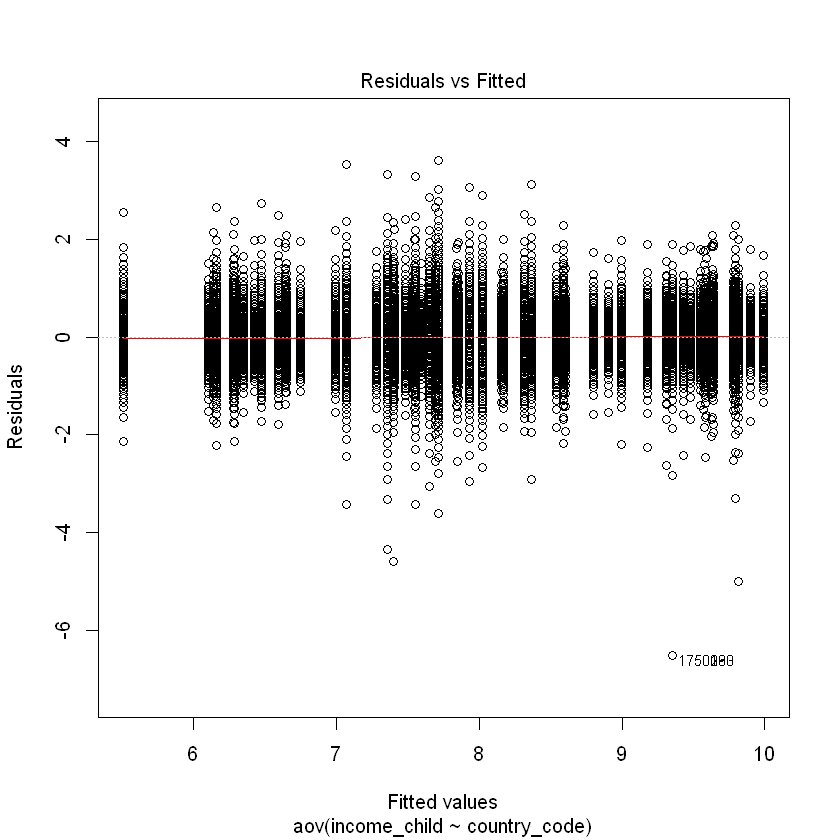

In [59]:
# Nettoyage de la mémoire
rm(country_aov)
gc()

# Compute the analysis of variance
ln_country_aov <- aov(income_child ~ country_code, data=df_ln_model)

print("Revenu moyen du pays et les revenus (parents & enfants) en logarithme (ln)")

# Test of Homogeneity of variances
# Levene’s test
library(car)
leveneTest(income_child ~ country_code, data=df_ln_model)
# Residual vs fitted
plot(ln_country_aov, 1)

Ici la valeur-p étant inférieure à 0,1%, l'hypothèse nulle est rejetée, les variances des groupes sont significativement différentes. Par conséquent, les résultats de l'ANOVA ne seront pas pertinents.

Le graphique montre que les variances sont hétérogènes car les résidus sont ne sont pas distribués de la même manière en-dessous et au-dessus de zéro.

Warning message in ks.test(x = residuals(object = ln_country_aov), y = "pnorm", :
"ties should not be present for the Kolmogorov-Smirnov test"


	One-sample Kolmogorov-Smirnov test

data:  residuals(object = ln_country_aov)
D = 0.11643, p-value < 2.2e-16
alternative hypothesis: two-sided


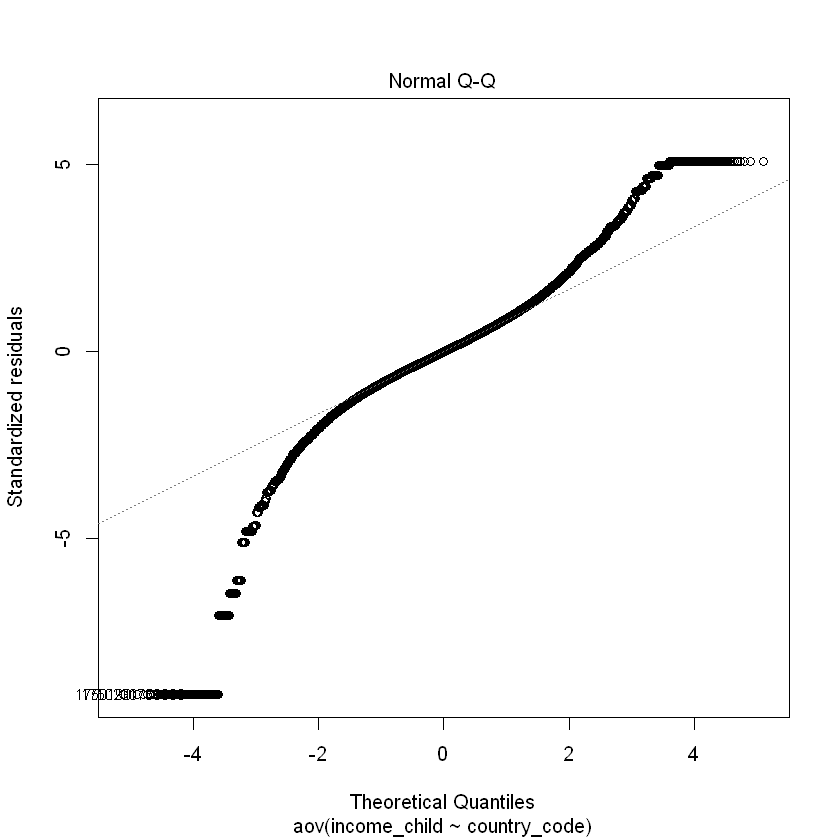

In [60]:
# Check the normality assumption
# Run Kolmogorov-Smirnov test
ks.test(x = residuals(object = ln_country_aov),y='pnorm',alternative='two.sided')
# Quantiles of the residuals against the quantiles of the normal distribution
plot(ln_country_aov, 2)

Le QQplot met en évidence un défaut de normalité, tout comme le test de Kolmogorov-Smirnov qui rejette l’hypothèse de normalité.

In [61]:
# Summary of the analysis
summary(ln_country_aov)

                  Df  Sum Sq Mean Sq F value Pr(>F)    
country_code      64 5143571   80368  159646 <2e-16 ***
Residuals    3249935 1636072       1                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [62]:
# Nettoyage de la mémoire
rm(ln_country_aov)
gc()

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,944893,50.5,5678279,303.3,5881541,314.2
Vcells,42112255,321.3,674912244,5149.2,882030213,6729.4


#### Analyse de la performance du modèle

Deux des trois hypothèses nécessaires pour effectuer une ANOVA ne sont pas satisafaites. C'est dommage. En effet, le tableau de l’ANOVA renvoie une p-valeur (plus petite que 2 × 10-16) inférieure à 1 % pour le *test F*. Celui-ci compare la variation entre les moyennes de l'échantillon à la variation au sein de groupes. On peut donc considérer qu’il y a un effet très hautement significatif du pays sur les revenus des individus.

Pour conturner ce problème, nous pourrions utiliser une ANOVA non-paramétrique. Ceci est en dehors du périmètre de ce projet.

- https://en.wikipedia.org/wiki/F-statistics
- http://www.analyticsforfun.com/2014/06/performing-anova-test-in-r-results-and.html
- http://www.statsoft.fr/concepts-statistiques/concepts-statistiques/test-non-parametriques/test-non-parametriques.htm

### Régressions linéaires

La régression linéaire fait plusieurs hypothèses sur les données, telles que:
- Variables explicatives quantitatives. Les données doit être quantitatives ; c'est le cas dans notre projet.
- Linéarité des données. La relation entre le(s) prédicteur(s) et le variable prédite est supposée être linéaire.
- Normalité des résidus. Les erreurs de prédiction sont supposées être normalement distribuées. Ci-dessous, une distribution non-normale.
<img src="Images/Normality-of-Error-Distribution-300x220.jpg">
- Homogénéité de la variance des résidus. Les résidus sont supposés avoir une variance constante (homoscédasticité). Ci-dessous, un exemple de distribution avec une variance non constante.
<img src="Images/Heteroscedasticity-300x230.jpg">
- Indépendance des résidus. Les résidus ne doivent pas s'influencer les uns des autres comme c'est le cas de le graphique de droite ci-dessous.
<img src="Images/Independence-of-Errors-300x153.jpg">


A déterminer sur chaque modèle selon le cours d'OC :
- La significativité des paramètres : un modèle correct doit avoir des paramètres significatifs.
- L'atypicité et l'influence éventuelle de certaines données : on pourra retirer les données atypiques et influentes.
<img src="Images/outliers_&_leverage_points.jpg">
- Les éventuels problèmes de colinéarité.
- Les éventuels problèmes d'hétéroscédasticité (quand la variance des résidus ne peut pas être considérée comme constante).


Sources :
- https://www.geeksforgeeks.org/multiple-linear-regression-using-r/
- http://www.sthda.com/english/articles/40-regression-analysis/168-multiple-linear-regression-in-r/
- http://ljk.imag.fr/membres/Clementine.Prieur/M1SSD/02exemple.pdf
- https://www.guru99.com/r-simple-multiple-linear-regression.html
- https://www.statisticssolutions.com/assumptions-of-multiple-linear-regression/
- https://rpubs.com/bensonsyd/385183
- https://en.wikipedia.org/wiki/Linear_regression#Assumptions
- https://www.statisticshowto.datasciencecentral.com/assumptions-conditions-for-regression/
- https://www.statisticssolutions.com/assumptions-of-multiple-linear-regression/
- https://www.theanalysisfactor.com/linear-models-r-diagnosing-regression-model/
- http://www.sthda.com/english/articles/39-regression-model-diagnostics/161-linear-regression-assumptions-and-diagnostics-in-r-essentials/#regression-assumptions
- https://www.statmethods.net/stats/rdiagnostics.html

#### Vérification de la colinéarité

Les éventuels problèmes colinéarité peuvent être traités avant d'appliquer les régressions linéaires. Pour les détecter, nous allons utiliser une matrice des corrélations
Avant d'appliquer les régressions linéaires, il faut regrarder les différentes matrices de corrélations.

Sources :
- http://www.sthda.com/english/wiki/correlation-matrix-a-quick-start-guide-to-analyze-format-and-visualize-a-correlation-matrix-using-r-software
- https://www.rdocumentation.org/packages/corrplot/versions/0.84/topics/corrplot

corrplot 0.84 loaded


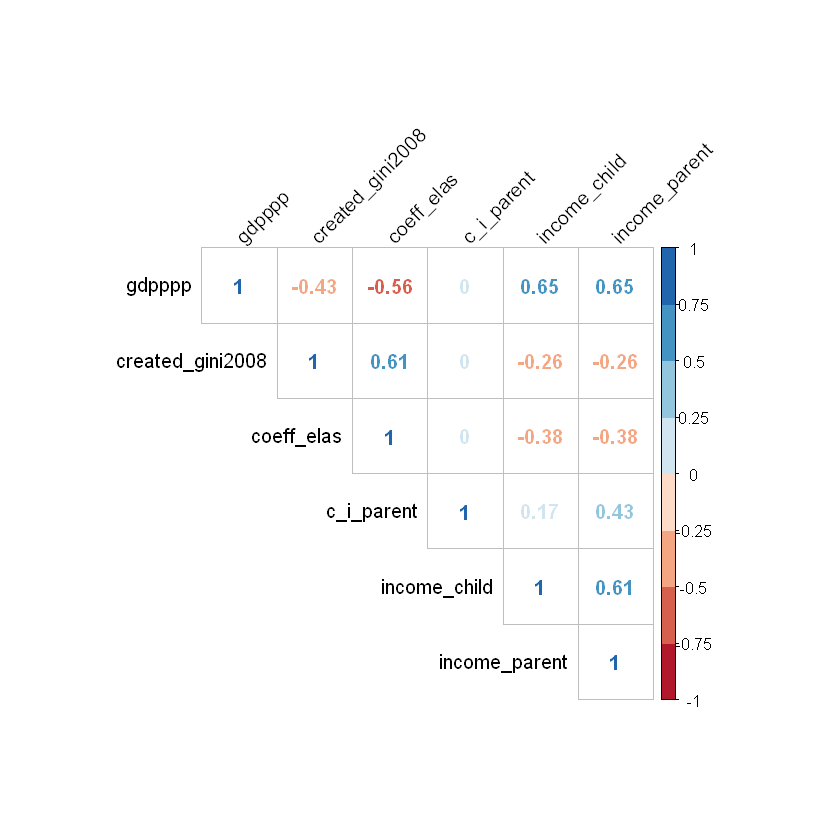

In [63]:
# install.packages("corrplot")
library(corrplot)
library(RColorBrewer) # Pour que tous les chiffres du graphique soient visibles

corrplot(df_model %>% select(-(1:2)) %>% cor(),
         method='number',
         type="upper",
         col = brewer.pal(n = 8, name = "RdBu"),
         outline=TRUE,
         order="original", 
         tl.col="black", 
         tl.srt=45)

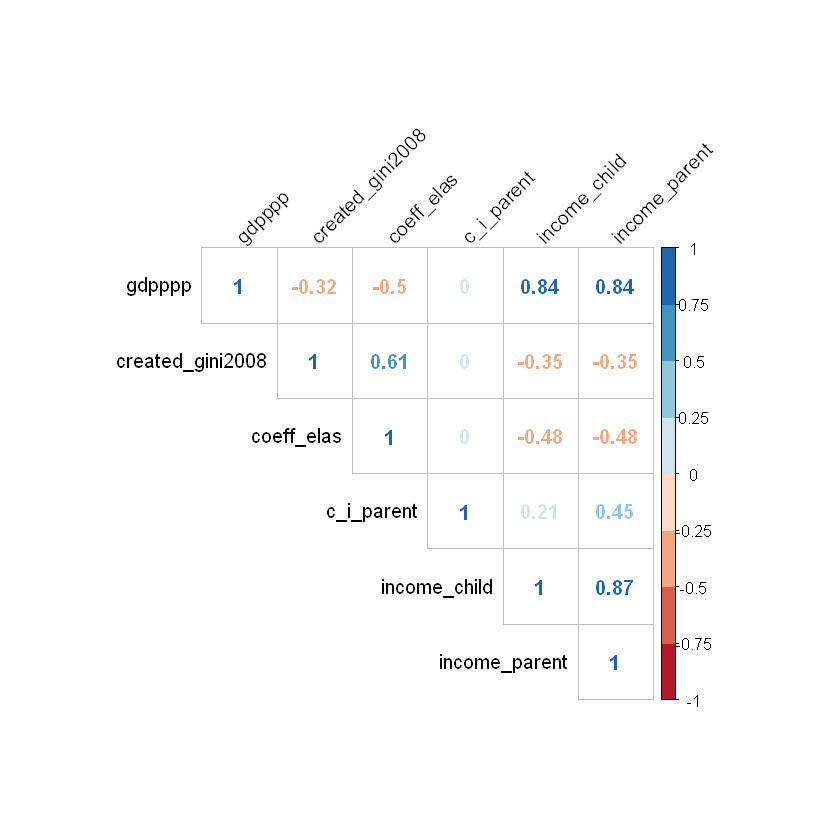

In [64]:
corrplot(df_ln_model %>% select(-(1:2)) %>% cor(),
         method='number',
         type="upper",
         col = brewer.pal(n = 8, name = "RdBu"),
         outline=TRUE,
         order="original", 
         tl.col="black", 
         tl.srt=45)

Dans la version exprimant les revenus en logarithme, il y a une corrélation forte entre les différents revenus. Ici, nous essayons de prédire le revenus des enfants, nous ne pouvons pas donc se passer de cette variable. Il semble cependant qu'il y ait un problème de colinéarité entre *income_parent* et *gdpppp*.

#### Première RL : Revenu moyen et indice de gini

In [65]:
first_model <- lm(income_child ~ gdpppp + created_gini2008, data=df_model)
summary(first_model)


Call:
lm(formula = income_child ~ gdpppp + created_gini2008, data = df_model)

Residuals:
   Min     1Q Median     3Q    Max 
-29078  -3130   -727    557 155871 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -667.98979   23.46919  -28.46   <2e-16 ***
gdpppp              0.47484    0.00034 1396.48   <2e-16 ***
created_gini2008 2742.23893   54.44684   50.37   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 8402 on 3249997 degrees of freedom
Multiple R-squared:  0.4175,	Adjusted R-squared:  0.4175 
F-statistic: 1.165e+06 on 2 and 3249997 DF,  p-value: < 2.2e-16


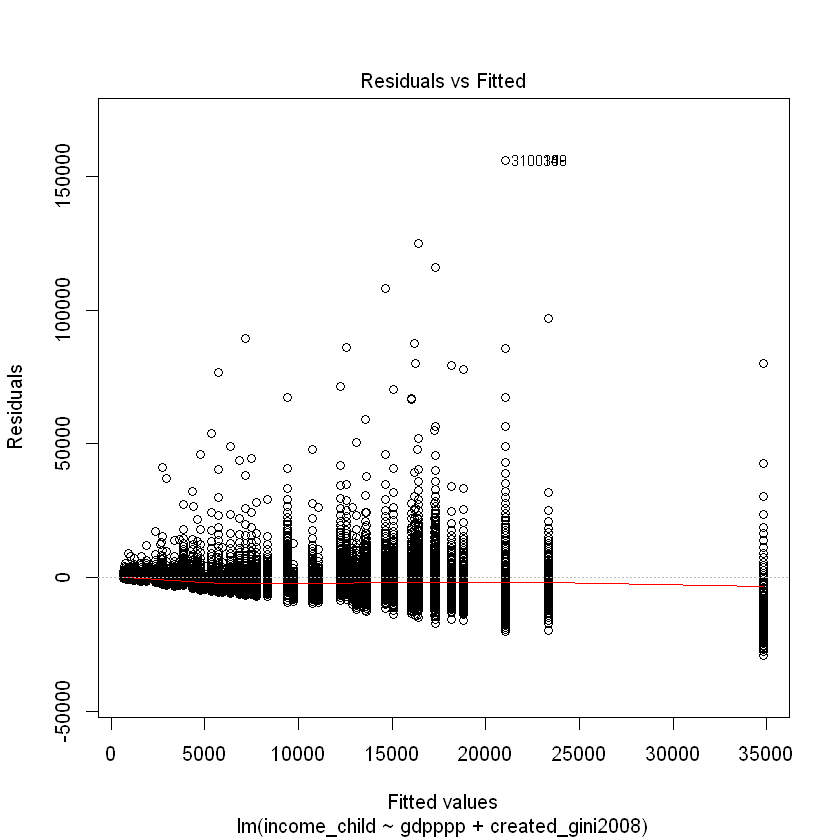

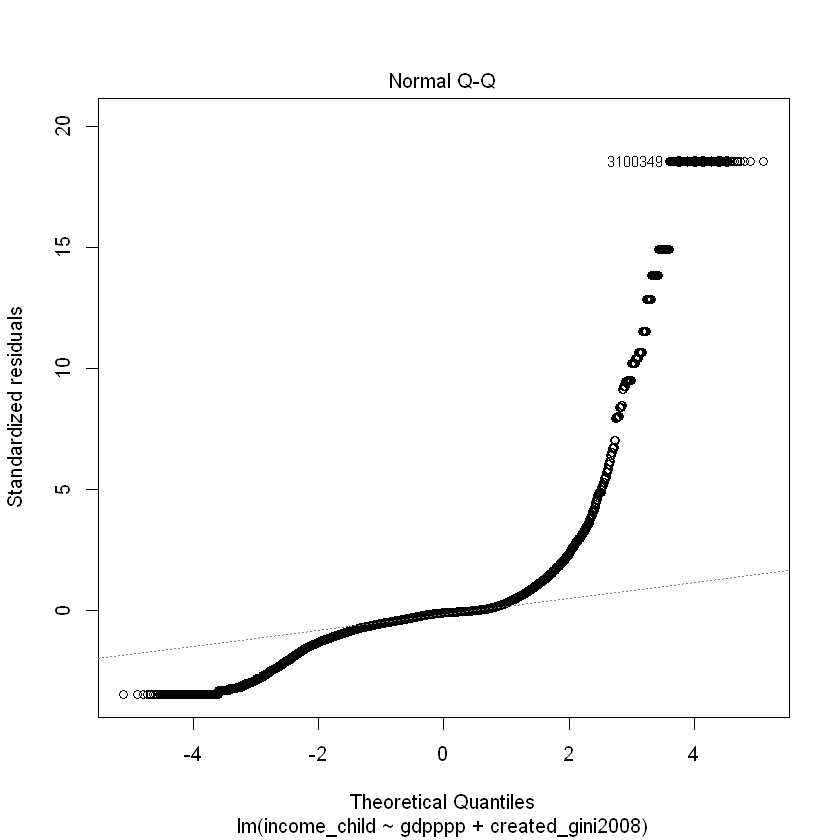

        rstudent unadjusted p-value Bonferonni p
3100100  18.5519         7.9445e-77    2.582e-70
3100158  18.5519         7.9445e-77    2.582e-70
3100349  18.5519         7.9445e-77    2.582e-70
3100465  18.5519         7.9445e-77    2.582e-70
3100533  18.5519         7.9445e-77    2.582e-70
3100562  18.5519         7.9445e-77    2.582e-70
3100608  18.5519         7.9445e-77    2.582e-70
3100803  18.5519         7.9445e-77    2.582e-70
3100974  18.5519         7.9445e-77    2.582e-70
3101017  18.5519         7.9445e-77    2.582e-70

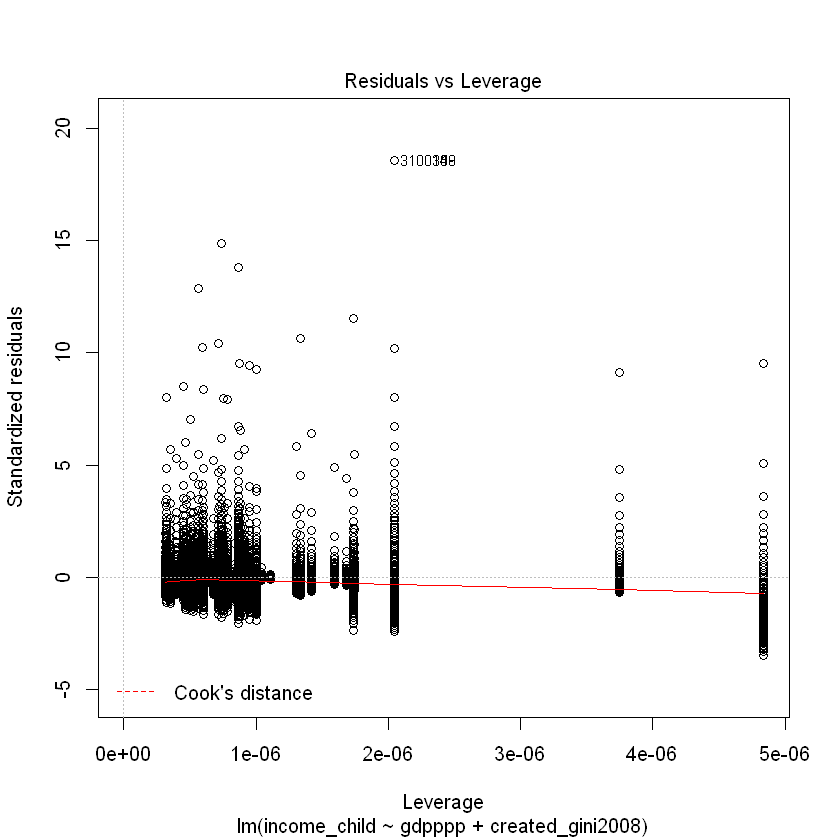

In [66]:
# Linéarité des données et Homogénité de la variance
plot(first_model, 1)

# Normalité des résidus
plot(first_model, 2)

# Homogénité de la variance
# plot(first_model, 3)

# Outliers and high levarage points
plot(first_model, 5)
outlierTest(first_model) # Bonferonni p-value for most extreme obs

**Analyse premier modèle** :
- Linéarité des données : Le premier graphique montre que le résidu moyen change peu avec les valeurs ajustées (et donc ne change pas avec x).
- Homogénité de la variance : En outre, la dispersion des résidus augmente à mesure que les valeurs ajustées augmentent. Cela indique une effet hétéroscédastique.
- Normalité des résidus : Dans le cas où tout se passe bien, les points suivent la ligne droite sur le deuxième graphique. Ici, les résidus ne suivent clairement pas une distribution normale.
- L'atypicité et l'influence éventuelle de certaines données : Notre dernier graphique ne montre aucun point influent qui se situent au-delà la ligne de distance de Cook en pontillées (qui n'apparraît même pas ici)
- La significativité des paramètres : Les coefficients décrivent la relation mathématique entre chaque variable indépendante et la variable dépendante. Les valeurs-p des coefficients indiquent si ces relations sont statistiquement significatives. Dans notre cas, toutes les variables explicatives sont statistiquement significatives car leurs valeurs p sont inférieures à 1%.

In [67]:
first_ln_model <- lm(income_child ~ gdpppp + created_gini2008, data=df_ln_model)
summary(first_ln_model)


Call:
lm(formula = income_child ~ gdpppp + created_gini2008, data = df_ln_model)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.0354 -0.4545 -0.0021  0.4602  3.5412 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       0.3171336  0.0041199   76.98   <2e-16 ***
gdpppp            0.9185023  0.0003519 2610.09   <2e-16 ***
created_gini2008 -1.3852236  0.0047359 -292.49   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.7694 on 3249997 degrees of freedom
Multiple R-squared:  0.7162,	Adjusted R-squared:  0.7162 
F-statistic: 4.101e+06 on 2 and 3249997 DF,  p-value: < 2.2e-16


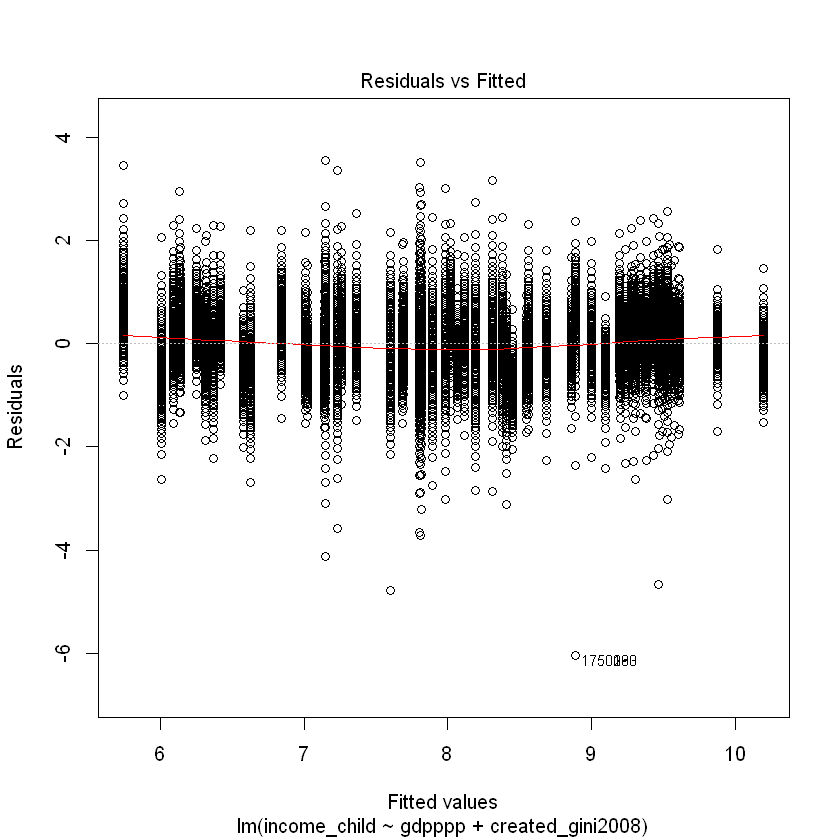

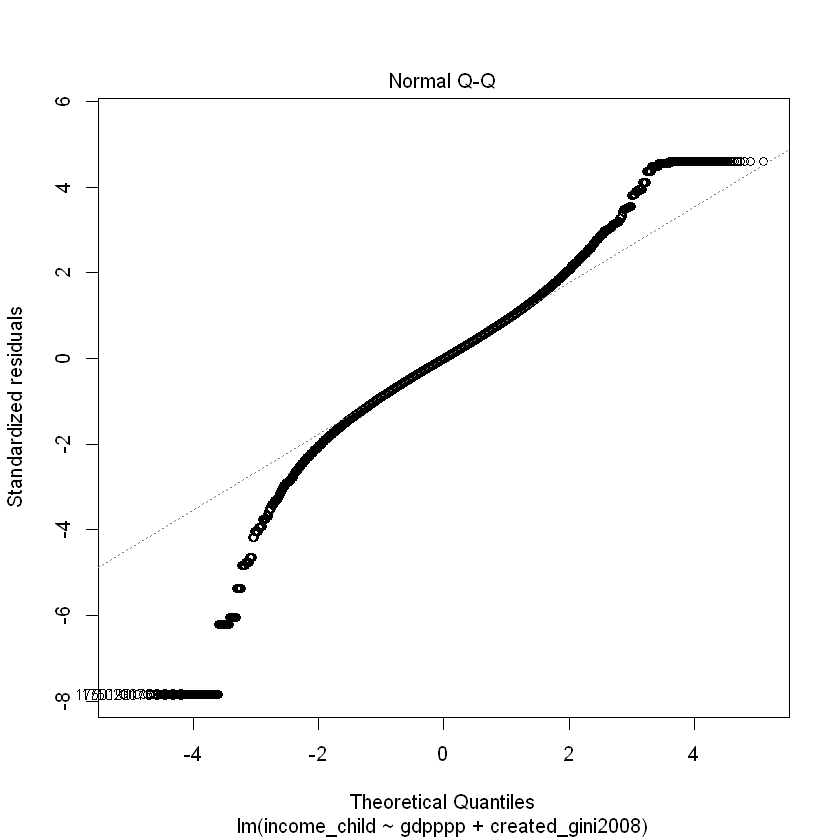

         rstudent unadjusted p-value Bonferonni p
1750063 -7.843973         4.3664e-15   1.4191e-08
1750190 -7.843973         4.3664e-15   1.4191e-08
1750230 -7.843973         4.3664e-15   1.4191e-08
1750305 -7.843973         4.3664e-15   1.4191e-08
1750328 -7.843973         4.3664e-15   1.4191e-08
1750448 -7.843973         4.3664e-15   1.4191e-08
1750560 -7.843973         4.3664e-15   1.4191e-08
1750629 -7.843973         4.3664e-15   1.4191e-08
1750792 -7.843973         4.3664e-15   1.4191e-08
1750802 -7.843973         4.3664e-15   1.4191e-08

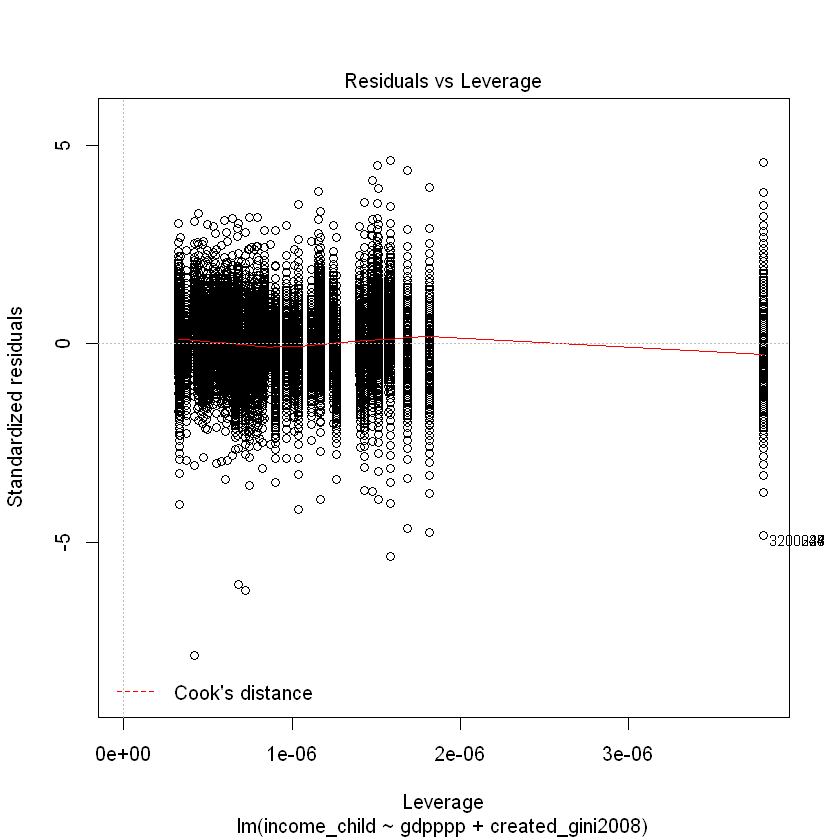

In [68]:
# Linéarité des données et Homogénité de la variance
plot(first_ln_model, 1)

# Normalité des résidus
plot(first_ln_model, 2)

# Outliers and high levarage points
plot(first_ln_model, 5)
outlierTest(first_ln_model) # Bonferonni p-value for most extreme obs

**Analyse premier modèle (ln)** :
- Linéarité des données : Le premier graphique montre que le résidu moyen change peu avec les valeurs ajustées (et donc ne change pas avec x).
- Homogénité de la variance : En outre, la dispersion des résidus n'augmente pas à mesure que les valeurs ajustées augmentent.
- Normalité des résidus : Les résidus aux extrémités de l'axe des ordonnées ne suivent pas une distribution normale.
- L'atypicité et l'influence éventuelle de certaines données : Notre dernier graphique ne montre aucun point influent qui se situent au-delà la ligne de distance de Cook en pontillées (qui n'apparaît même pas ici).
- La significativité des paramètres : Toutes les variables explicatives sont statistiquement significatives car leurs valeurs p sont inférieures à 1%.

**Variance expliquée :**
R² est le pourcentage de variance de la variable cible qui est expliquée par la régression linéaire. Le modèle logarithmique est plus performant ici, 71,6% de la variance est expliquée par ce modèle. Les autres facteurs non considérés dans le modèle (efforts, chance, etc) sont responsables de 28,4% de la variance.

#### Deuxième RL : revenu moyen, indice de gini et classe de revenu des parents

In [69]:
second_model <- lm(income_child ~ gdpppp + created_gini2008 + c_i_parent, data=df_model)
summary(second_model)


Call:
lm(formula = income_child ~ gdpppp + created_gini2008 + c_i_parent, 
    data = df_model)

Residuals:
   Min     1Q Median     3Q    Max 
-32143  -3082   -981   1360 158556 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -3.859e+03  2.425e+01  -159.1   <2e-16 ***
gdpppp            4.748e-01  3.319e-04  1430.6   <2e-16 ***
created_gini2008  2.742e+03  5.315e+01    51.6   <2e-16 ***
c_i_parent        6.319e+01  1.576e-01   400.9   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 8202 on 3249996 degrees of freedom
Multiple R-squared:  0.445,	Adjusted R-squared:  0.445 
F-statistic: 8.686e+05 on 3 and 3249996 DF,  p-value: < 2.2e-16


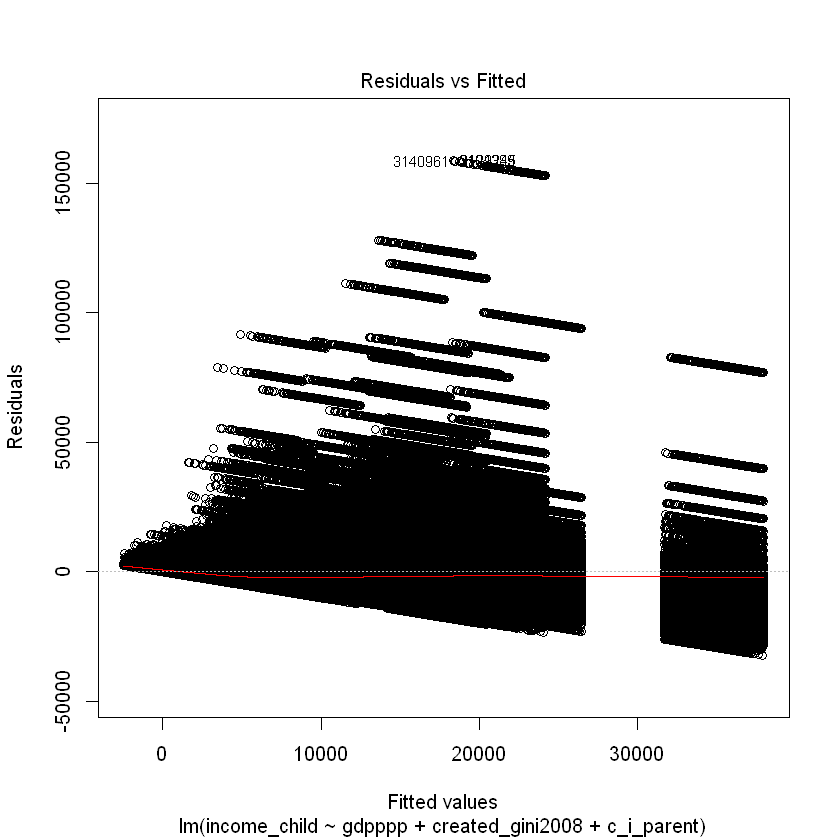

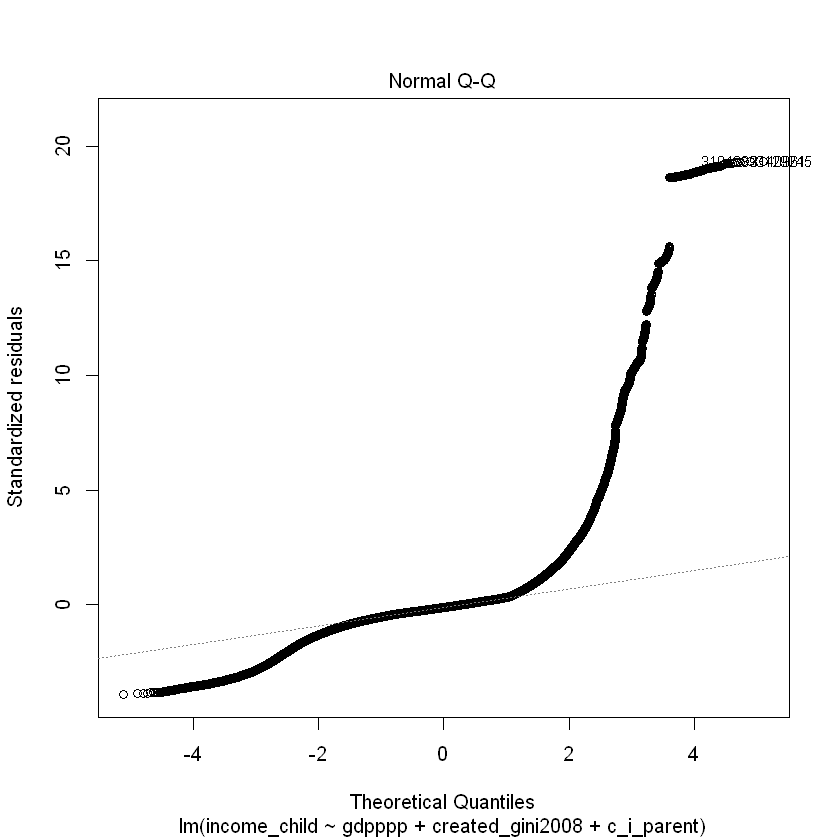

        rstudent unadjusted p-value Bonferonni p
3104389 19.33270         2.8821e-83   9.3670e-77
3129245 19.32499         3.3463e-83   1.0876e-76
3140961 19.31728         3.8850e-83   1.2626e-76
3109953 19.28646         7.0541e-83   2.2926e-76
3124768 19.27105         9.5019e-83   3.0881e-76
3117603 19.26334         1.1027e-82   3.5838e-76
3134728 19.22481         2.3190e-82   7.5368e-76
3144219 19.22481         2.3190e-82   7.5368e-76
3118697 19.21711         2.6903e-82   8.7433e-76
3135439 19.21711         2.6903e-82   8.7433e-76

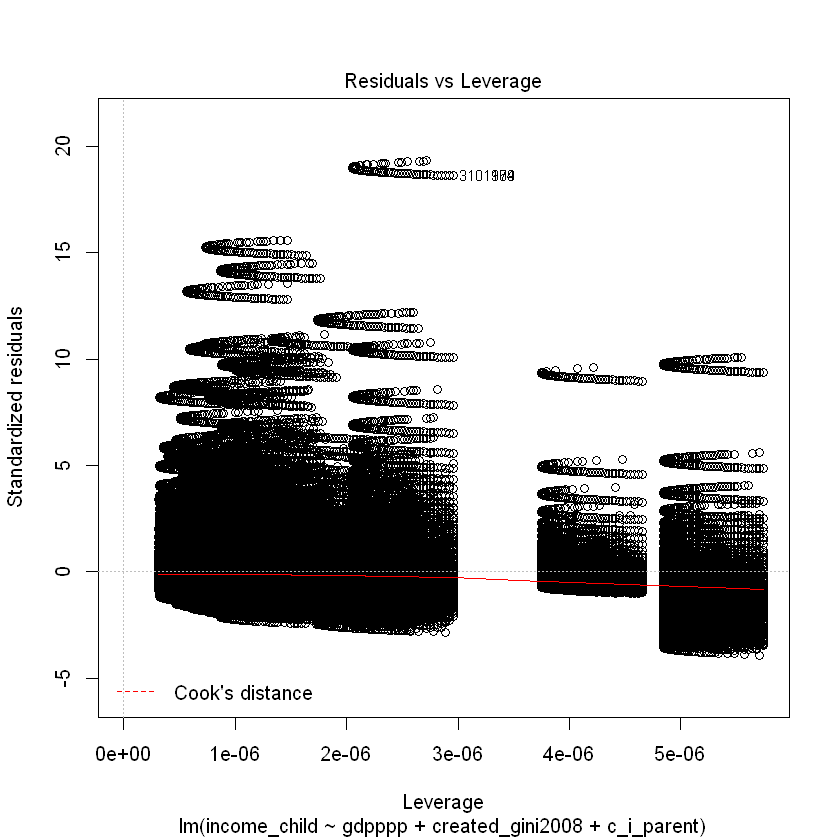

In [70]:
# Linéarité des données
plot(second_model, 1)

# Normalité des résidus
plot(second_model, 2)

# Outliers and high levarage points
plot(second_model, 5)
outlierTest(second_model) # Bonferonni p-value for most extreme obs

**Analyse deuxième modèle** :
- Linéarité des données : Le premier graphique montre que le résidu moyen change peu avec les valeurs ajustées (et donc ne change pas avec x).
- Homogénité de la variance : En outre, la dispersion des résidus augmente à mesure que les valeurs ajustées augmentent. Cela indique une effet hétéroscédastique.
- Normalité des résidus : Les résidus ne suivent clairement pas une distribution normale.
- L'atypicité et l'influence éventuelle de certaines données : Notre dernier graphique ne montre aucun point influent qui se situent au-delà la ligne de distance de Cook en pontillées (qui n'apparaît même pas ici).
- La significativité des paramètres : Toutes les variables explicatives sont statistiquement significatives car leurs valeurs p sont inférieures à 1%.

In [71]:
second_ln_model <- lm(income_child ~ gdpppp + created_gini2008 + c_i_parent, data=df_ln_model)
summary(second_ln_model)


Call:
lm(formula = income_child ~ gdpppp + created_gini2008 + c_i_parent, 
    data = df_ln_model)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.5192 -0.4341 -0.0011  0.4369  3.8770 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -2.082e-01  3.855e-03  -54.02   <2e-16 ***
gdpppp            9.185e-01  3.240e-04 2834.92   <2e-16 ***
created_gini2008 -1.385e+00  4.360e-03 -317.69   <2e-16 ***
c_i_parent        1.040e-02  1.361e-05  764.22   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.7084 on 3249996 degrees of freedom
Multiple R-squared:  0.7594,	Adjusted R-squared:  0.7594 
F-statistic: 3.42e+06 on 3 and 3249996 DF,  p-value: < 2.2e-16


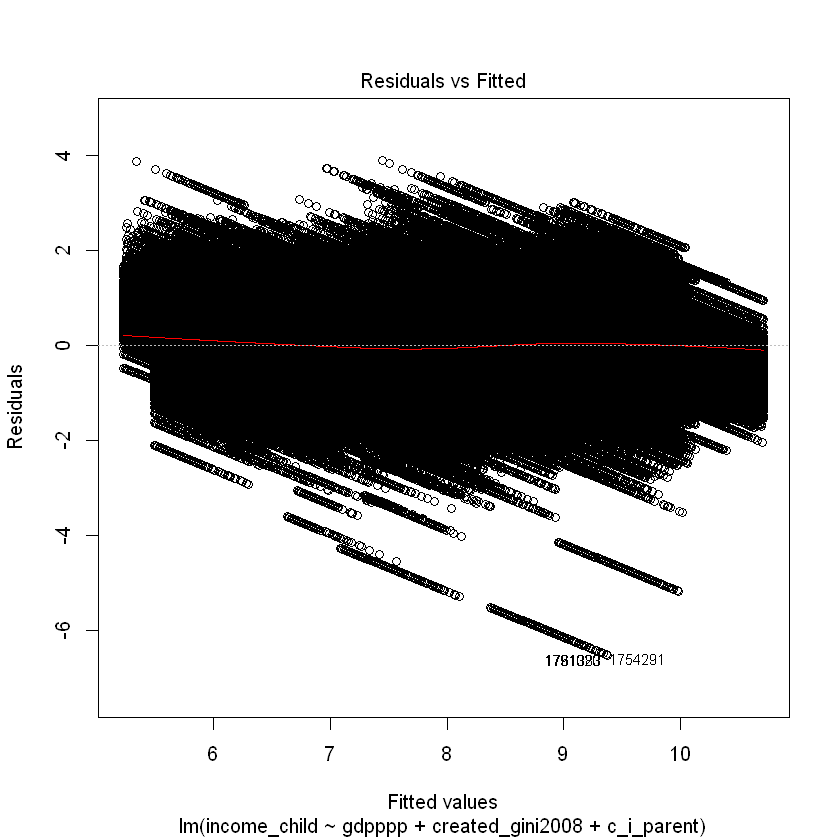

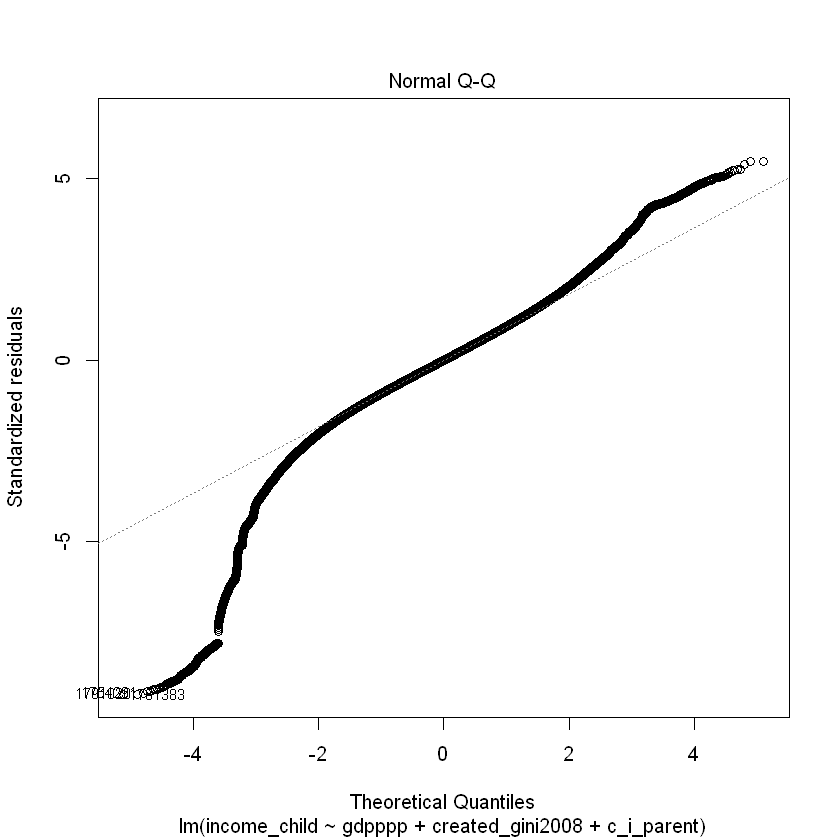

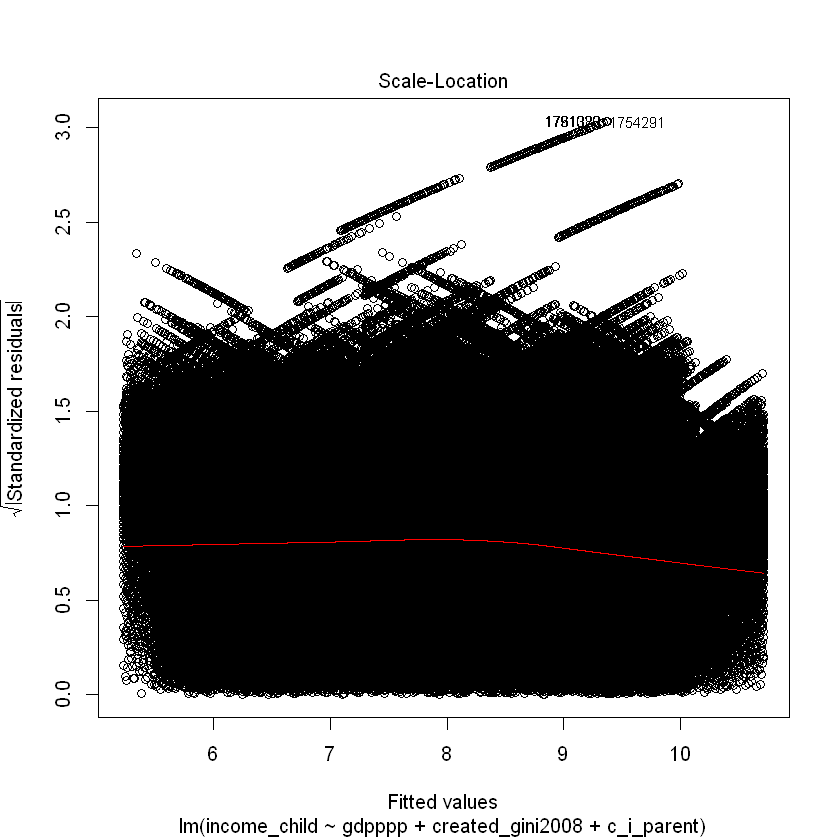

         rstudent unadjusted p-value Bonferonni p
1761383 -9.202568         3.4969e-20   1.1365e-13
1791020 -9.187881         4.0088e-20   1.3029e-13
1754291 -9.158509         5.2648e-20   1.7111e-13
1796299 -9.129137         6.9085e-20   2.2453e-13
1750448 -9.114451         7.9113e-20   2.5712e-13
1759492 -9.070392         1.1865e-19   3.8562e-13
1774441 -9.055706         1.3576e-19   4.4122e-13
1778674 -9.055706         1.3576e-19   4.4122e-13
1758625 -9.026334         1.7761e-19   5.7724e-13
1750560 -8.996962         2.3217e-19   7.5455e-13

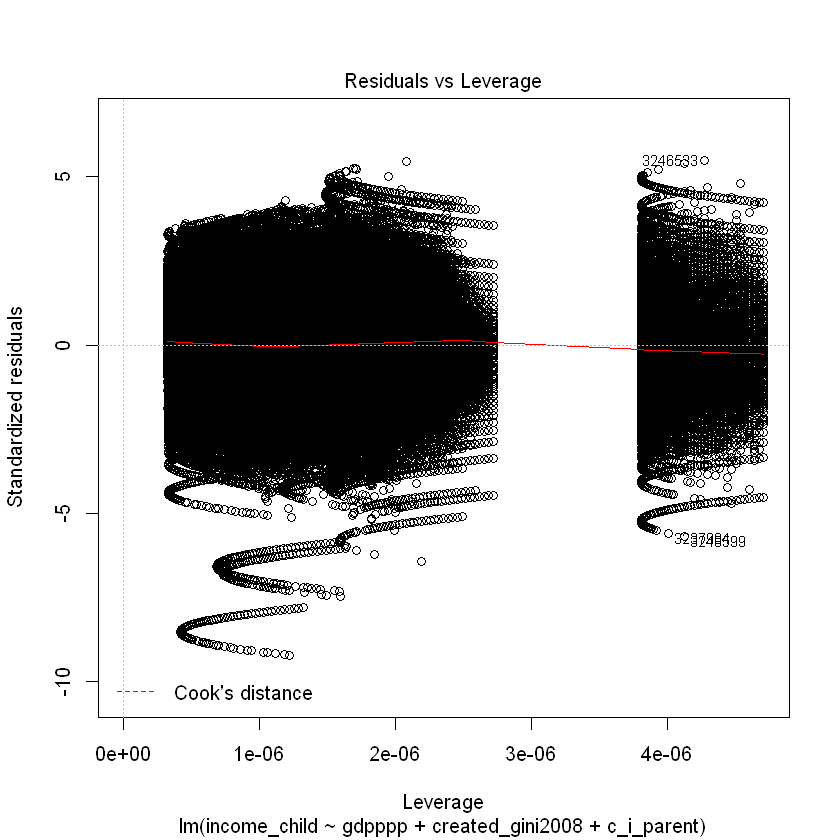

In [72]:
# Linéarité des données
plot(second_ln_model, 1)

# Normalité des résidus
plot(second_ln_model, 2)

# Homogénité de la variance
plot(second_ln_model, 3)

# Outliers and high levarage points
plot(second_ln_model, 5)
outlierTest(second_ln_model) # Bonferonni p-value for most extreme obs

**Analyse deuxième modèle (ln)** :
- Linéarité des données : Le premier graphique montre que le résidu moyen change peu avec les valeurs ajustées (et donc ne change peu avec x).
- Homogénité de la variance : En outre, la dispersion des résidus n'augmente pas à mesure que les valeurs ajustées augmentent.
- Normalité des résidus : Les résidus aux extrémités de l'axe des ordonnées ne suivent pas une distribution normale.
- L'atypicité et l'influence éventuelle de certaines données : Notre dernier graphique ne montre aucun point influent qui se situent au-delà la ligne de distance de Cook en pontillées (qui n'apparaît même pas ici).
- La significativité des paramètres : Toutes les variables explicatives sont statistiquement significatives car leurs valeurs p sont inférieures à 1%.

**Variance expliquée :**
Le pourcentage de variance expliqué par ce nouveau modèle est de 76%.

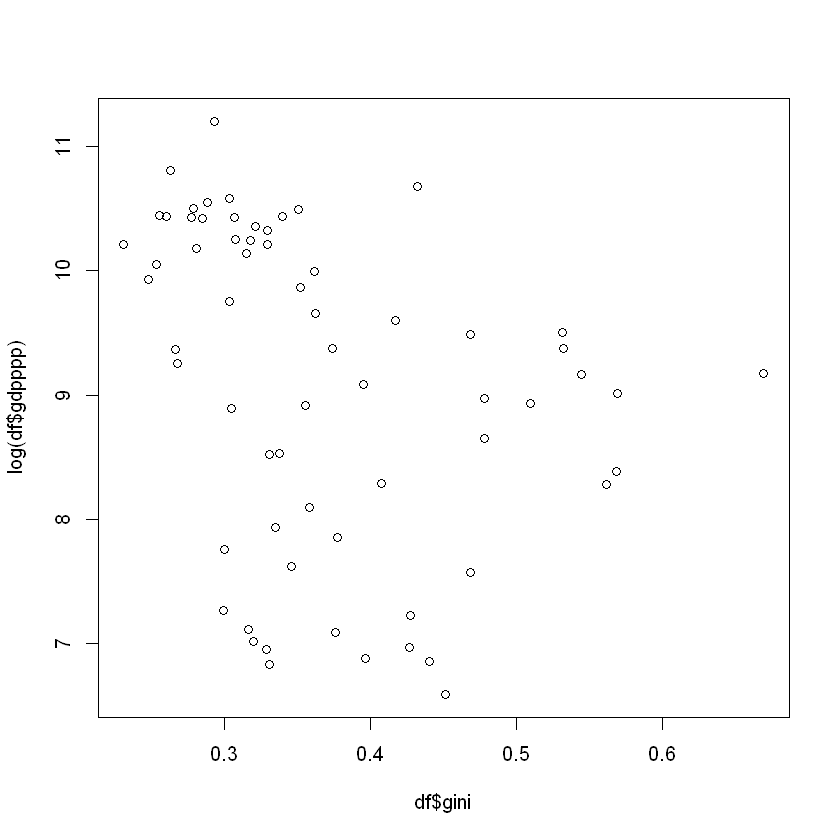

In [73]:
df <- df_model %>%
    group_by(country_code) %>%
    summarise(gini=first(created_gini2008), gdpppp=first(gdpppp))

plot(df$gini, log(df$gdpppp))

#### Troisème RL : revenu moyen, indice de gini et le revenu des parents

In [74]:
third_model <- lm(income_child ~ gdpppp + created_gini2008 + income_parent, data=df_model)
summary(third_model)


Call:
lm(formula = income_child ~ gdpppp + created_gini2008 + income_parent, 
    data = df_model)

Residuals:
   Min     1Q Median     3Q    Max 
-66540  -2559   -563    526 161282 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -4.437e+02  2.211e+01  -20.07   <2e-16 ***
gdpppp            3.154e-01  4.051e-04  778.50   <2e-16 ***
created_gini2008  1.821e+03  5.131e+01   35.50   <2e-16 ***
income_parent     3.358e-01  5.225e-04  642.65   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7914 on 3249996 degrees of freedom
Multiple R-squared:  0.4832,	Adjusted R-squared:  0.4832 
F-statistic: 1.013e+06 on 3 and 3249996 DF,  p-value: < 2.2e-16


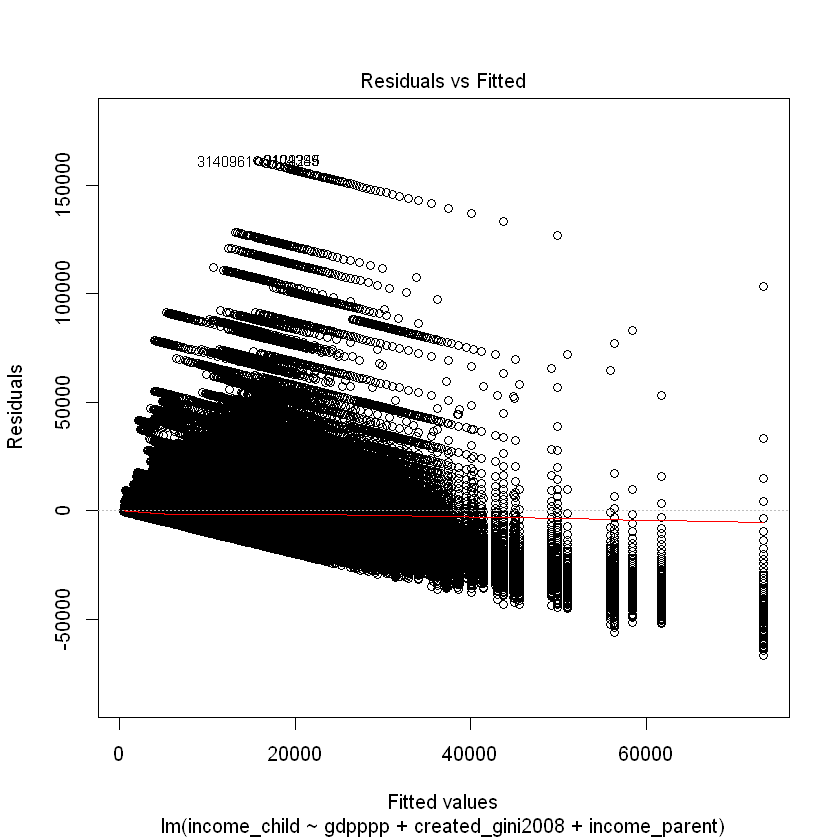

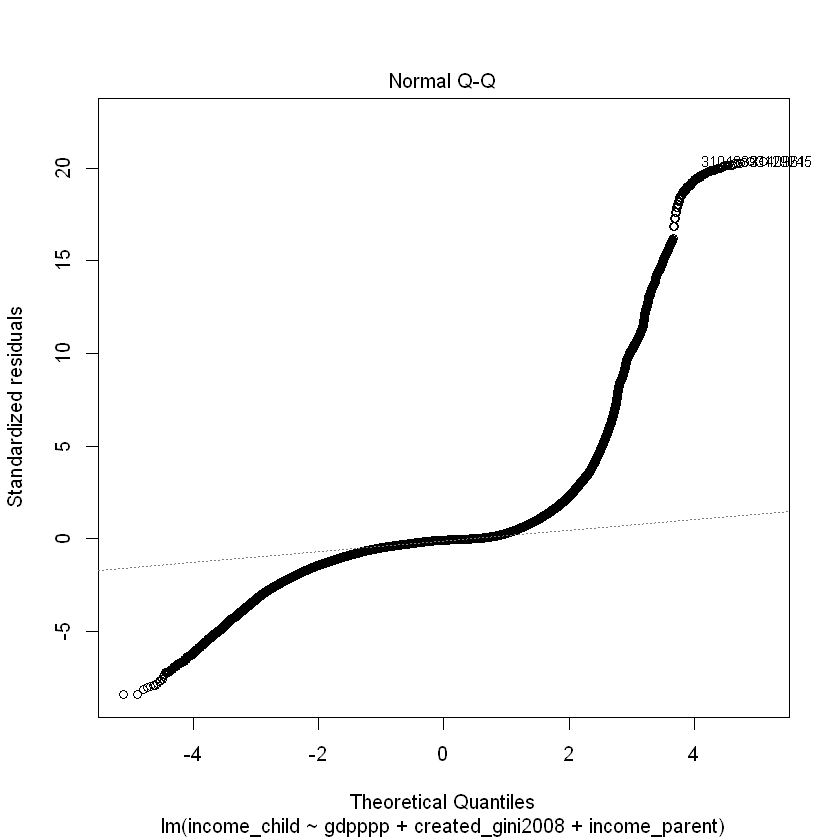

        rstudent unadjusted p-value Bonferonni p
3104389 20.37945         2.5790e-92   8.3816e-86
3129245 20.36388         3.5446e-92   1.1520e-85
3140961 20.34235         5.4993e-92   1.7873e-85
3109953 20.28378         1.8121e-91   5.8894e-85
3124768 20.25510         3.2449e-91   1.0546e-84
3117603 20.24151         4.2758e-91   1.3896e-84
3134728 20.17029         1.8088e-90   5.8787e-84
3144219 20.17029         1.8088e-90   5.8787e-84
3118697 20.16082         2.1906e-90   7.1196e-84
3135439 20.16082         2.1906e-90   7.1196e-84

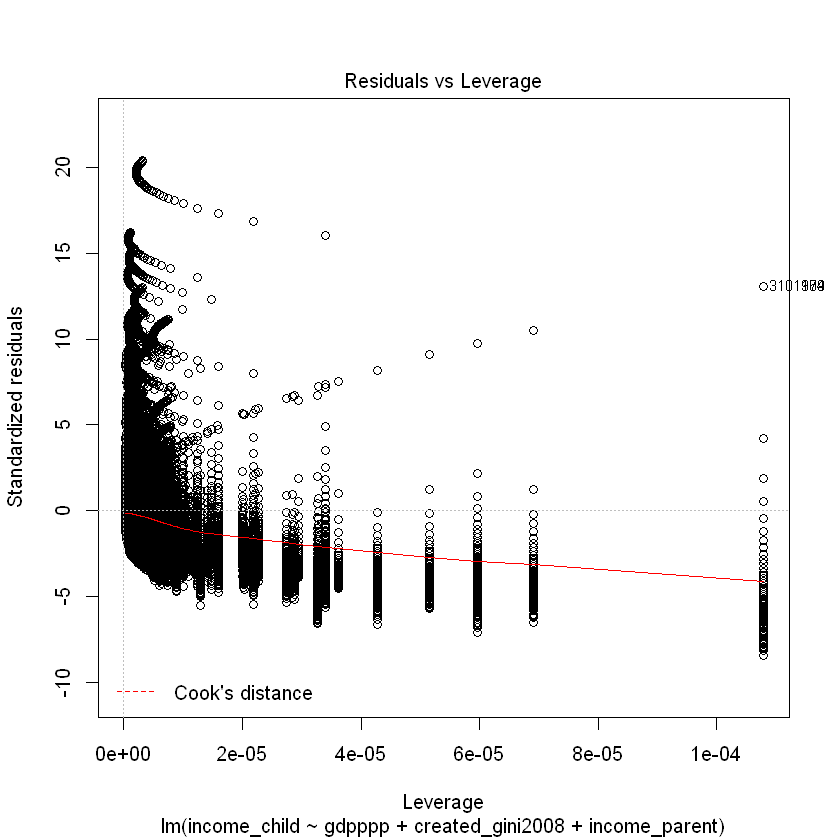

In [75]:
# Linéarité des données
plot(third_model, 1)

# Normalité des résidus
plot(third_model, 2)

# Outliers and high levarage points
plot(third_model, 5)
outlierTest(third_model) # Bonferonni p-value for most extreme obs

**Analyse troisième modèle** :
- Linéarité des données : Le premier graphique montre que le résidu moyen change peu avec les valeurs ajustées (et donc ne change pas avec x).
- Homogénité de la variance : En outre, la dispersion des résidus indique une effet hétéroscédastique.
- Normalité des résidus : Les résidus ne suivent clairement pas une distribution normale.
- L'atypicité et l'influence éventuelle de certaines données : Notre dernier graphique ne montre aucun point influent qui se situent au-delà la ligne de distance de Cook en pontillées (qui n'apparaît même pas ici).
- La significativité des paramètres : Toutes les variables explicatives sont statistiquement significatives car leurs valeurs p sont inférieures à 1%.

In [76]:
third_ln_model <- lm(income_child ~ gdpppp + created_gini2008 + income_parent, data=df_ln_model)
summary(third_ln_model)


Call:
lm(formula = income_child ~ gdpppp + created_gini2008 + income_parent, 
    data = df_ln_model)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.9625 -0.3806 -0.0079  0.3795  5.1194 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       0.1412911  0.0034317   41.17   <2e-16 ***
gdpppp            0.4092162  0.0005153  794.12   <2e-16 ***
created_gini2008 -0.6171524  0.0039928 -154.57   <2e-16 ***
income_parent     0.5544745  0.0004616 1201.14   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.6403 on 3249996 degrees of freedom
Multiple R-squared:  0.8034,	Adjusted R-squared:  0.8034 
F-statistic: 4.428e+06 on 3 and 3249996 DF,  p-value: < 2.2e-16


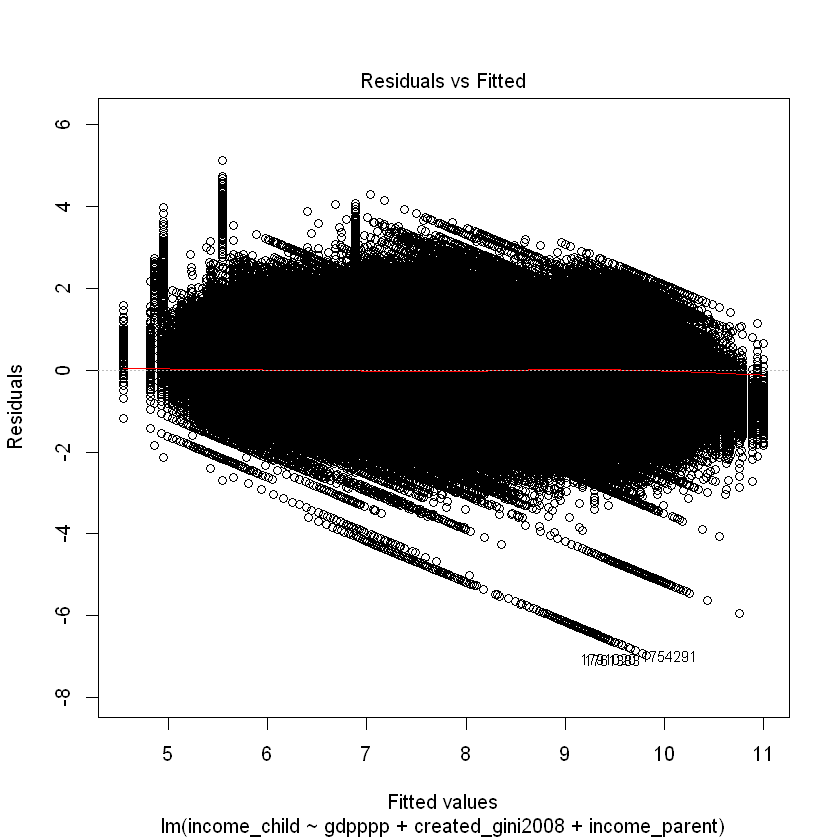

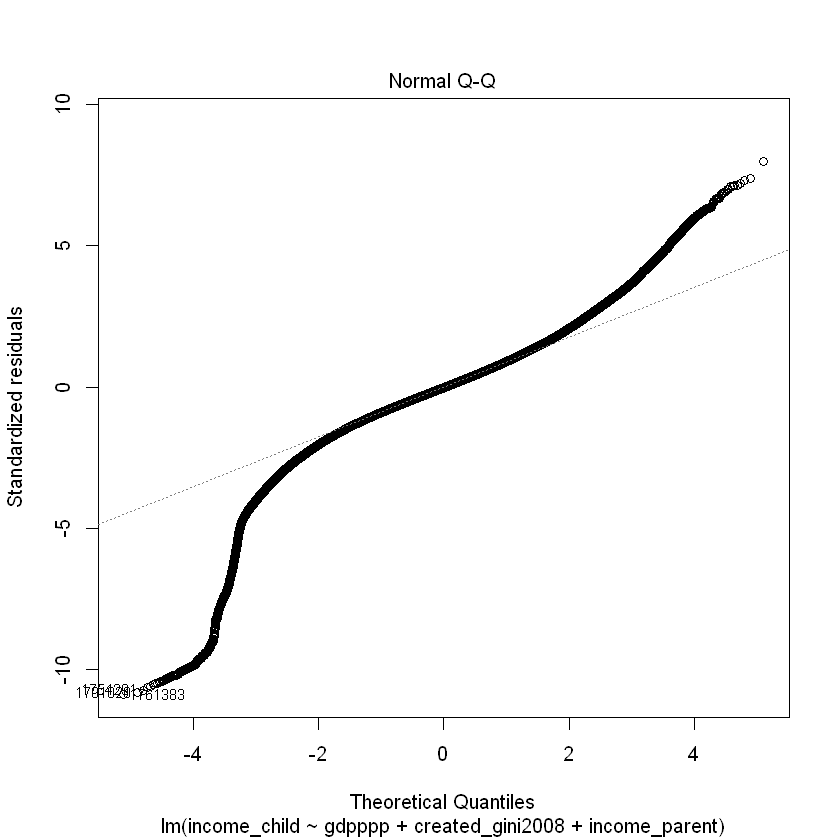

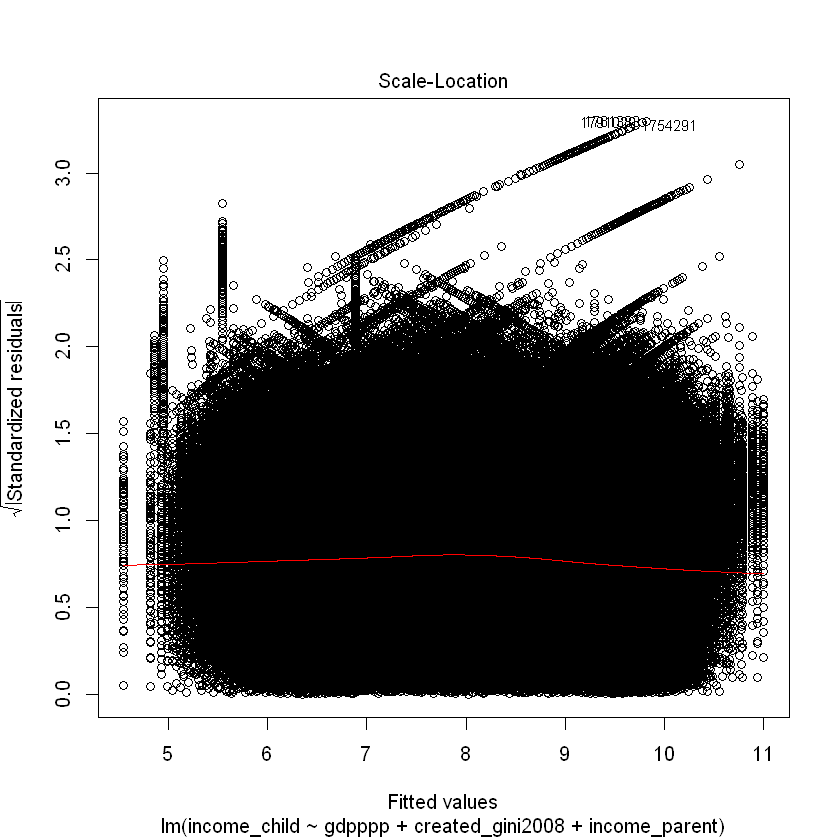

         rstudent unadjusted p-value Bonferonni p
1761383 -10.87351         1.5432e-27   5.0155e-21
1791020 -10.81288         2.9946e-27   9.7324e-21
1754291 -10.70867         9.2778e-27   3.0153e-20
1796299 -10.62925         2.1808e-26   7.0875e-20
1750448 -10.59302         3.2139e-26   1.0445e-19
1759492 -10.50759         7.9782e-26   2.5929e-19
1774441 -10.48181         1.0482e-25   3.4068e-19
1778674 -10.48181         1.0482e-25   3.4068e-19
1758625 -10.43563         1.7064e-25   5.5458e-19
1750560 -10.39622         2.5819e-25   8.3913e-19

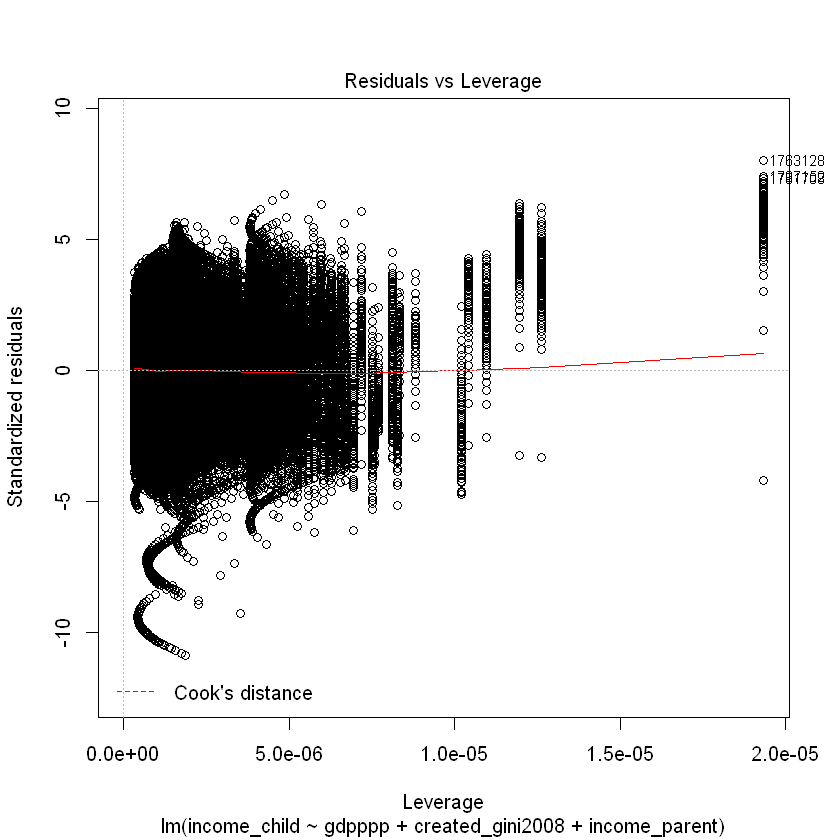

In [77]:
# Linéarité des données
plot(third_ln_model, 1)

# Normalité des résidus
plot(third_ln_model, 2)

# Homogénité de la variance
plot(third_ln_model, 3)

# Outliers and high levarage points
plot(third_ln_model, 5)
outlierTest(third_ln_model) # Bonferonni p-value for most extreme obs

**Analyse troisième modèle (ln)** :
- Linéarité des données : Le premier graphique montre que le résidu moyen change peu avec les valeurs ajustées (et donc ne change peu avec x).
- Homogénité de la variance : En outre, la dispersion des résidus n'augmente pas à mesure que les valeurs ajustées augmentent.
- Normalité des résidus : Les résidus aux extrémités de l'axe des ordonnées ne suivent pas une distribution normale.
- L'atypicité et l'influence éventuelle de certaines données : Notre dernier graphique ne montre aucun point influent qui se situent au-delà la ligne de distance de Cook en pontillées (qui n'apparaît même pas ici).
- La significativité des paramètres : Toutes les variables explicatives sont statistiquement significatives car leurs valeurs p sont inférieures à 1%.

**Variance expliquée :**
Le pourcentage de variance expliqué par le dernier modèle est de 80%.

## Bonus
### Stepwise Regression

Je vais utiliser une *stepwise regression* pour voir les variables qui seront sélectionnées par cet algorithme.

Sources :
- https://www.statmethods.net/stats/regression.html
- https://www.guru99.com/r-simple-multiple-linear-regression.html
- http://www.sthda.com/english/articles/36-classification-methods-essentials/150-stepwise-logistic-regression-essentials-in-r/

In [78]:
# Stepwise Regression
library(MASS)
fit <- lm(log(income_child) ~ log(gdpppp) + created_gini2008 + coeff_elas + c_i_parent + log(income_parent),data=df_model)
step <- stepAIC(fit, direction="both")
summary(step) # display results 


Attaching package: 'MASS'

The following object is masked from 'package:dplyr':

    select



Start:  AIC=-2994305
log(income_child) ~ log(gdpppp) + created_gini2008 + coeff_elas + 
    c_i_parent + log(income_parent)

                     Df Sum of Sq     RSS      AIC
<none>                            1293468 -2994305
- coeff_elas          1       201 1293669 -2993802
- created_gini2008    1      1130 1294598 -2991468
- log(gdpppp)         1     24075 1317543 -2934371
- c_i_parent          1     38300 1331768 -2899471
- log(income_parent)  1    333561 1627028 -2248664



Call:
lm(formula = log(income_child) ~ log(gdpppp) + created_gini2008 + 
    coeff_elas + c_i_parent + log(income_parent), data = df_model)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.0081 -0.3669 -0.0083  0.3650  6.1015 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         4.518e-01  3.688e-03  122.51   <2e-16 ***
log(gdpppp)         2.039e-01  8.290e-04  245.95   <2e-16 ***
created_gini2008   -2.536e-01  4.759e-03  -53.29   <2e-16 ***
coeff_elas         -4.411e-02  1.964e-03  -22.46   <2e-16 ***
c_i_parent         -6.992e-03  2.254e-05 -310.21   <2e-16 ***
log(income_parent)  7.749e-01  8.465e-04  915.48   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.6309 on 3249994 degrees of freedom
Multiple R-squared:  0.8092,	Adjusted R-squared:  0.8092 
F-statistic: 2.757e+06 on 5 and 3249994 DF,  p-value: < 2.2e-16


In [79]:
rm(fit, step)
gc()

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,4245385,226.8,6853934,366.1,5881541,314.2
Vcells,285953907,2181.7,674912244,5149.2,882030213,6729.4
